- 주요 내용
    - 로지스틱회귀 이해 (퍼셉트론, 아달린)
    - 시그모이드 함수 이해
    - 로지스틱 손실함수와 가중치, 절편의 업데이트
    - 4장은 아직 남아있습니다
---
- *주요 내용은 본 챕터에서 다루는 내용을 내용 중심으로 변경하여 사용하였으며, 아래 제목은 책의 제목을 그대로 따릅니다*
- *문과생이 스스로 학습하기 위한 자료입니다. 혹시 틀린 부분이 있다면 알려주시면 감사하겠습니다*
- *아래 손으로 그려진 그림은 책의 그림과 유사하게 그려져 있습니다*
- *각종 유도식의 경우, 책의 내용과 최대한 동일하게 작성하였으나 이해가 되지 않는 부분은 부연설명 하였습니다*
---

# 4-1. 초기 인공지능 알고리즘과 로지스틱 회귀를 알아봅니다.

## 퍼셉트론에 대해 알아봅니다.

> 퍼셉트론의 전체 구조를 훑어봅니다

- 직선방정식을 사용하여 선형회귀와 유사한 구조를 가짐
- 마지막 단계에서는 샘플의 이진분류를 위하여 계단함수를 통과한 값을 가중치와 절편의 업데이트에 사용함
    - 일반적인 선형함수 식 : w1*x1 + w2*x2 + b = z
    - 계단함수는 z가 0보다 크거나 같으면 1로, 0보다 작으면 -1로 분류함
    - 이 때 1을 양성 클래스, -1을 음성 클래스로 부름

In [2]:
from IPython.display import Image

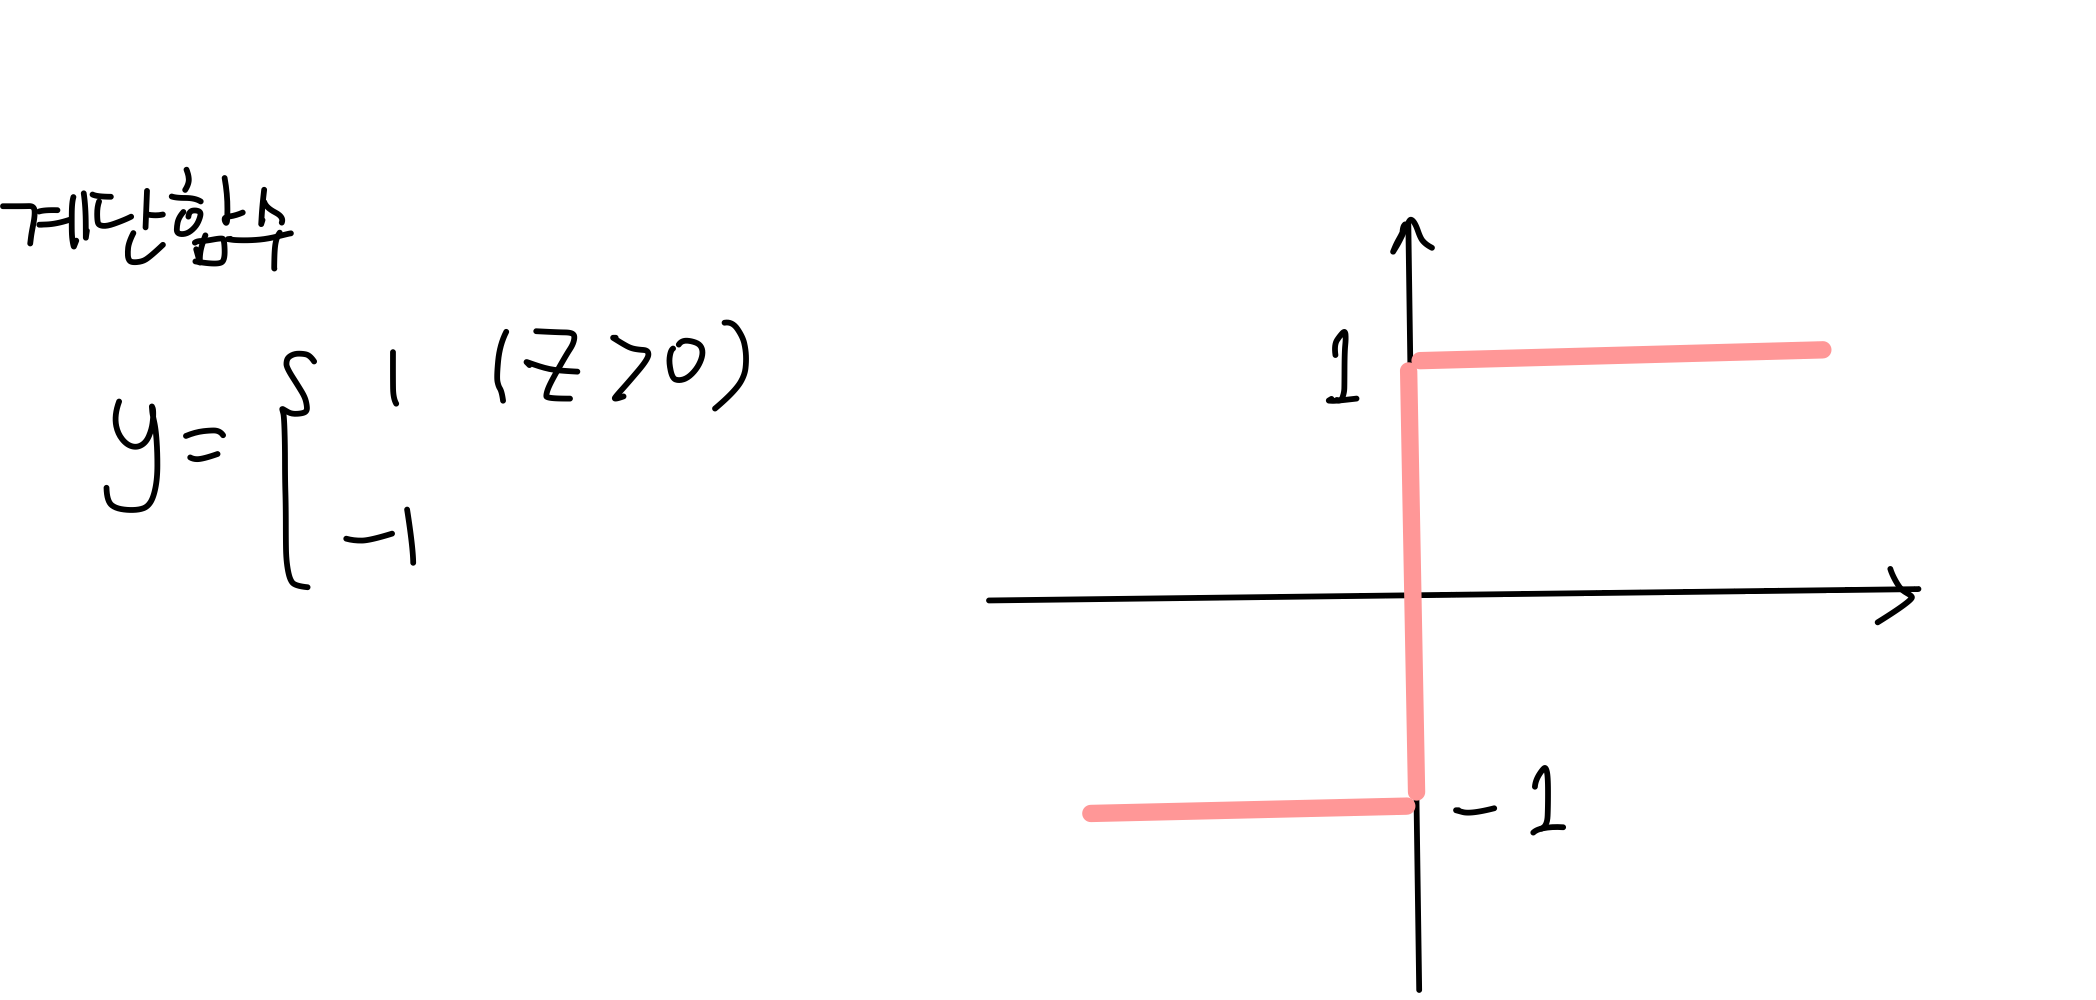

In [15]:
Image("./image/계단함수.png", width=500)

> 여러개의 특성 사용하기

- 3장에서는 입력이 1개 였지만, 대부분 여러 특성이 입력으로 옴
- 앞서 살펴봤던 w*x + b의 식은 다음과 같이 변함
    - z = w1*x1 + w2*x2 + w3*x3 + ... + wn * xn + b
    - sigma를 사용하여 z = b + ∑wixi (sigma i=1부터 n까지)
- 사이킷런 패키지에서 Perceptron이라는 이름으로 클래스를 제공

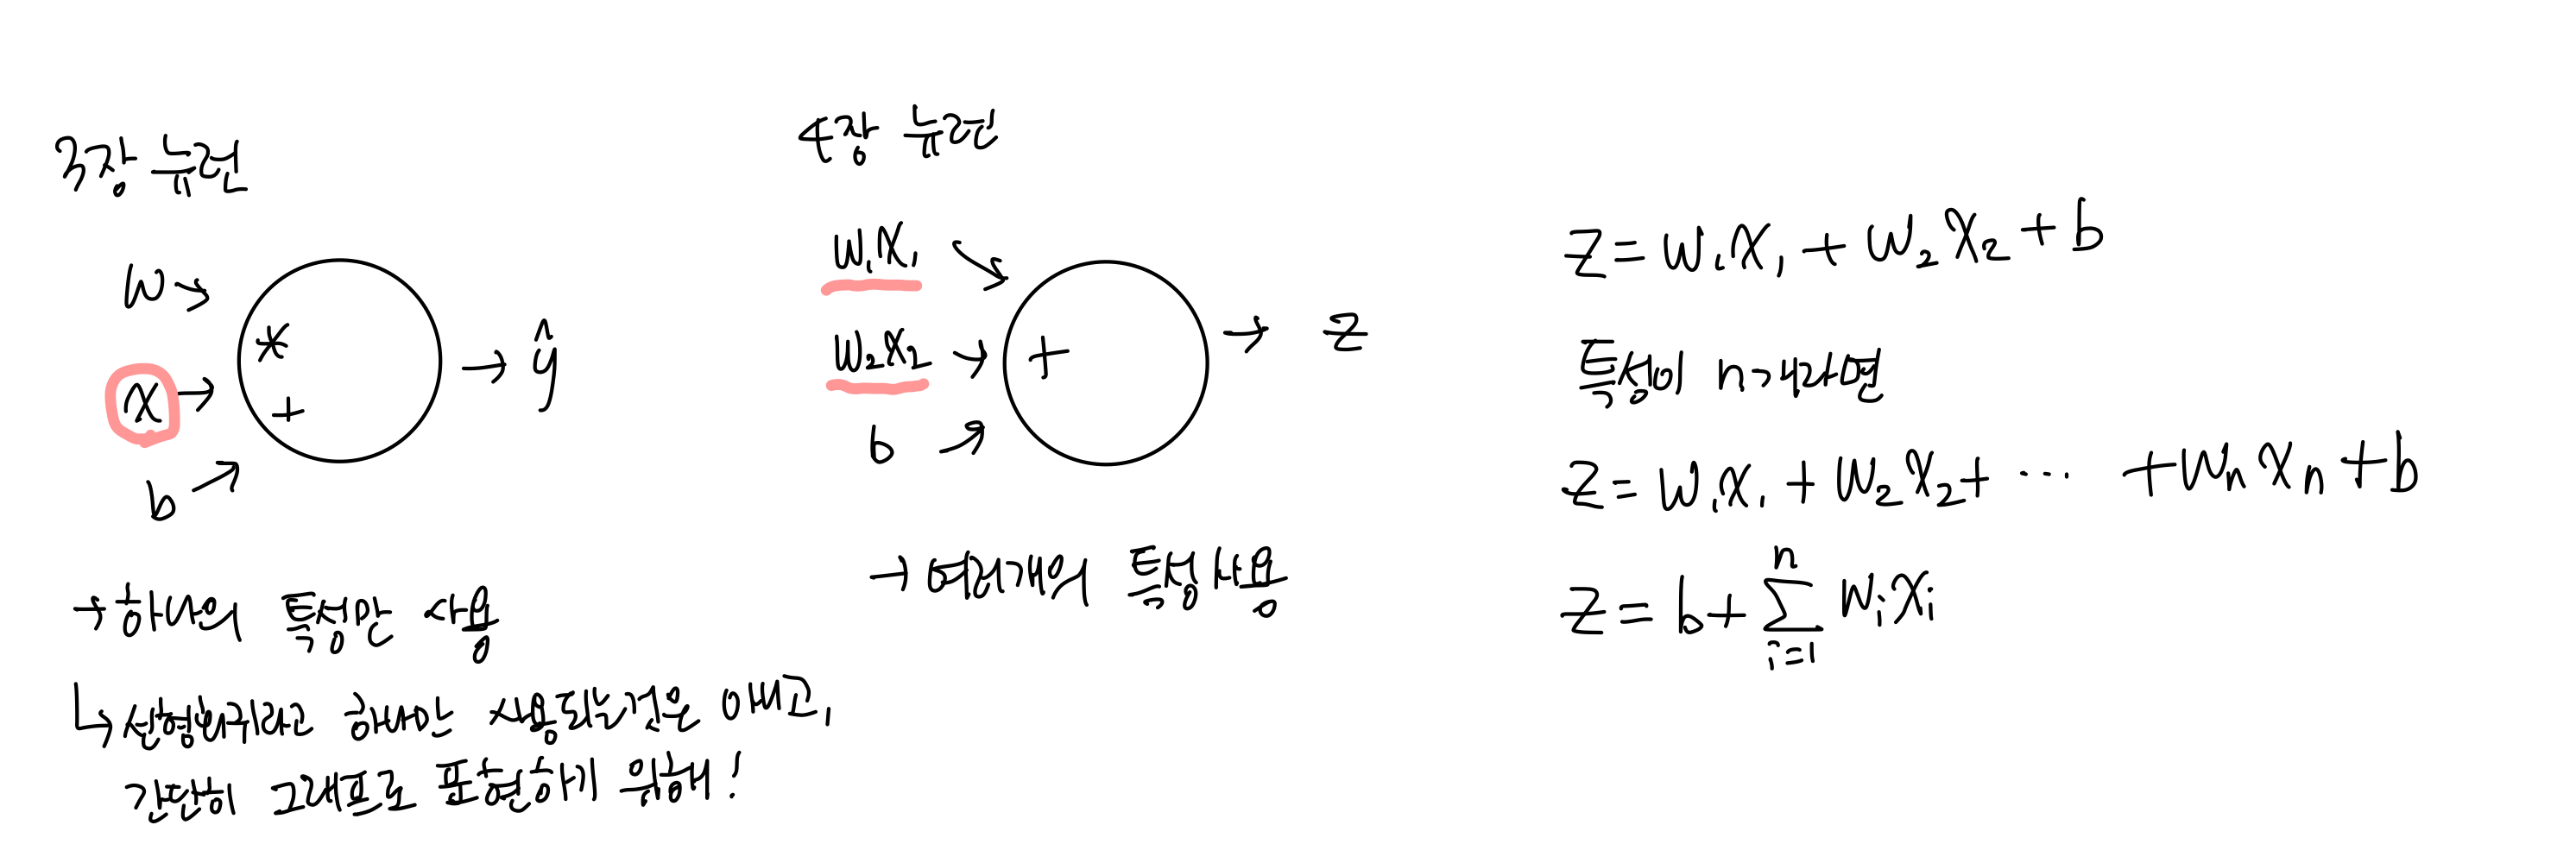

In [18]:
Image("./image/3,4장 뉴런비교.png", width=900)

## 아달린에 대해 알아봅니다.

- 퍼셉트론을 개선한 적응형 선형 뉴런(Adaptive Linear Neuron). Adalin으로 부르기도 함
- 선형함수의 결과를 학습에 사용하고, 계단함수의 결과는 예측에만 활용함
- 로지스틱 회귀는 아달린의 개선버전

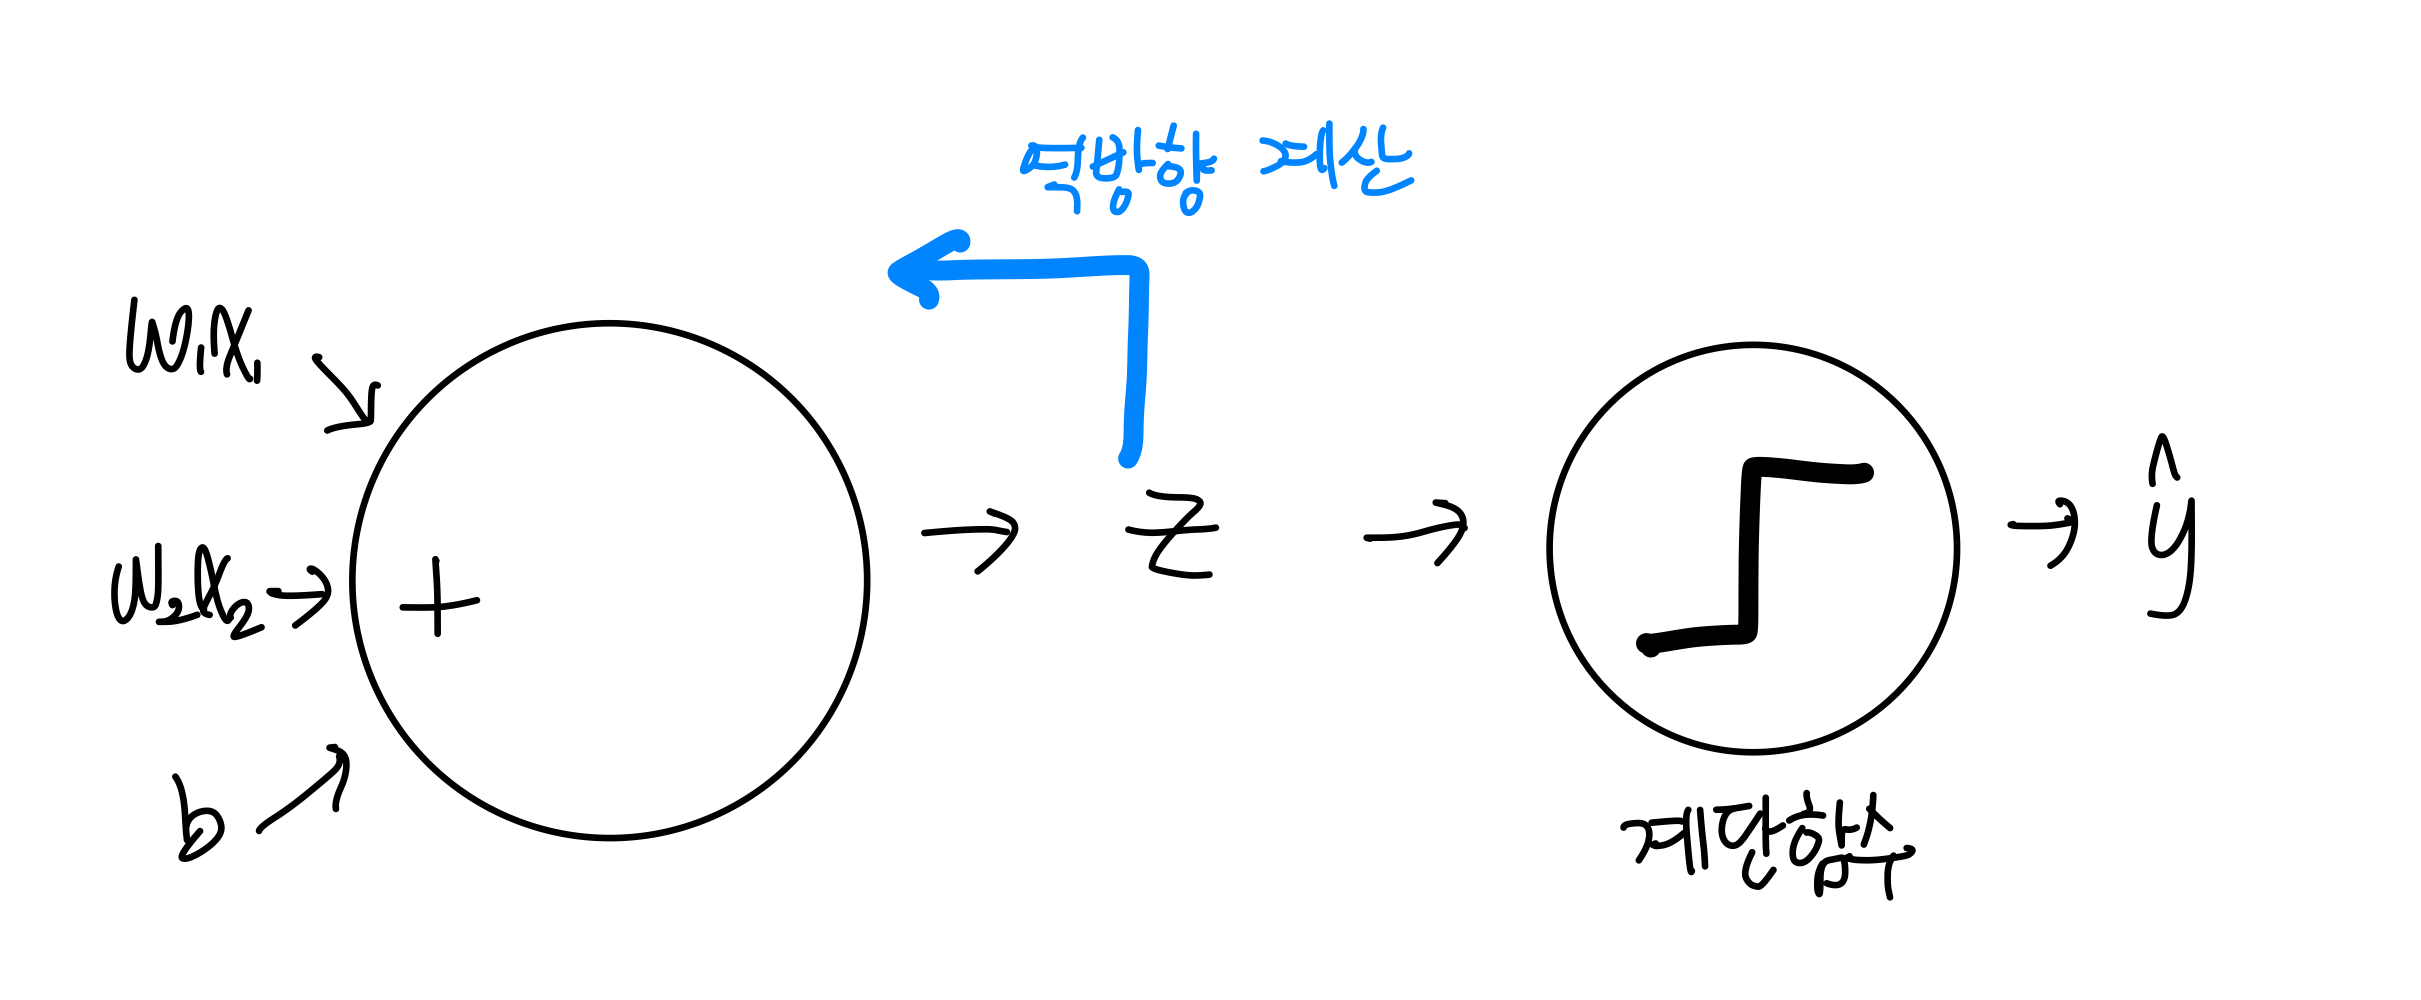

In [53]:
Image("./image/아달린.png", width=400)

## 로지스틱 회귀에 대해 알아봅니다.

- 아달린에서 조금 더 발전한 형태

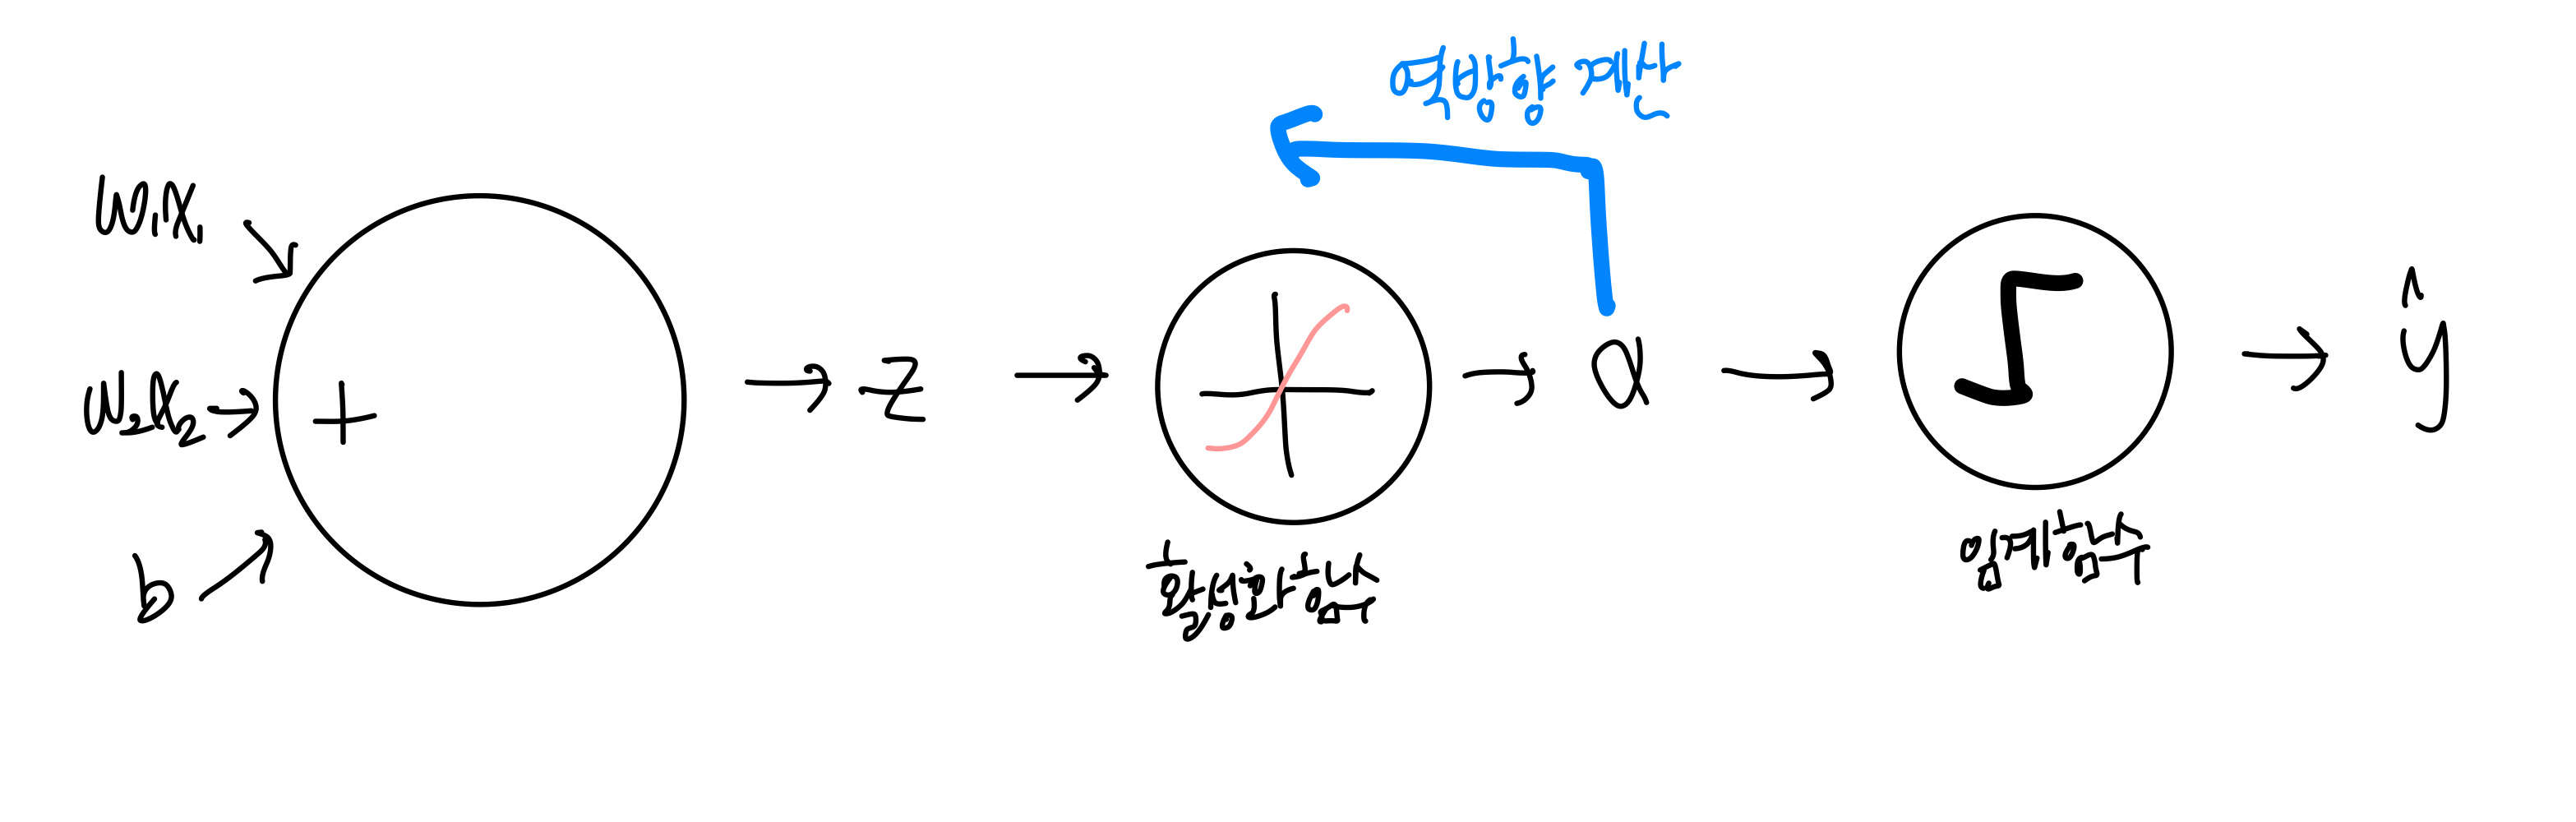

In [54]:
Image("./image/로지스틱회귀.png", width=600)

- 선형함수를 통과시켜 얻은 z를 활성화 함수를 통해 임계함수로 보냄
    - 활성화 함수(activation function): 입력받은 데이터를 다음 층으로 어떻게 출력할지 결정하는 함수
        - 대부분 비선형 함수를 사용
    - 임계함수(threshold function): boolean function으로 입력값이 특정 threshold(임계값)를 초과하는지 그렇지 않은지를 판단하는 함수

> 활성화 함수는 비선형 함수를 사용합니다.

- 활성화 함수가 선형함수라면?
    - y = ka라는 활성화 함수에 a = w1*x1 + w2*x2 + .. + b를 대입하면
    - y = k(w1*x1 + w2*x2 + .. + b)
    - 다시 조금 더 큰 선형함수로 바뀜 
    - 선형함수가 된다는 것은 층을 쌓는 의미가 없다는 것 (은닉층이 생기지 않음)
    - 은닉층을 늘려 학습시키고자 한다면 활성화 함수는 비선형 함수가 되어야 함
- 로지스틱 회귀에서는 '시그모이드'함수를 사용함

#### summary
- 퍼셉트론은 선형 함수에 계단함수가 추가된 것
- 퍼셉트론은 계단함수의 결과값으로 가중치를 학습함
- 아달린은 퍼셉트론의 개선버전으로 선형함수의 결과값으로 가중치를 학습함
- 로지스틱회귀는 아달린에 활성화 함수를 추가한 것

---

# 4-2. 시그모이드 함수로 확률을 만듭니다.

## 시그모이드 함수의 역할을 알아봅니다

- 시그모이드 함수: 시그모이드 함수는 S자형 곡선 또는 시그모이드 곡선을 갖는 수학 함수
- 시그모이드 함수를 활성화 함수로 사용하여 z값을 0과 1사이의 값으로 변환
- 시그모이드를 통과한 값 a를 암 종양 판정에 사용하면 0.5이상의 값일 때는 양성(악성종양), 0.5미만일 때는음성클래스로 구분

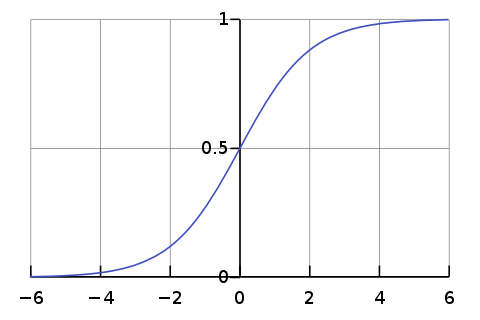

In [9]:
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/480px-Logistic-curve.svg.png")
# 출처: wiki백과_ https://ko.wikipedia.org/wiki/%EC%8B%9C%EA%B7%B8%EB%AA%A8%EC%9D%B4%EB%93%9C_%ED%95%A8%EC%88%98

## 시그모이드 함수가 만들어지는 과정을 살펴봅니다

- 오즈 비(odds ratio) > 로짓함수 > 시그모이드 함수

> 오즈 비(odds ratio)에 대해 알아볼까요?

- 오즈 비(odds ratio): 성공확률과 실패확률의 비율을 나타내는 통계
- p/(1-p)

> 로짓함수에 대해 알아볼까요?

- 오즈 비에 log함수를 취해서 만든 함수 (logit function)
- log(p/(1-p))

> 로지스틱 함수에 대해 알아볼까요?

- 로짓함수 식을 z에 대해 다시 정리하면 로지스틱 함수가 됨
- 유도 과정은 아래 식 참고
- 모양에서 착안하여 로지스틱 함수를 시그모이드 함수라고도 부름

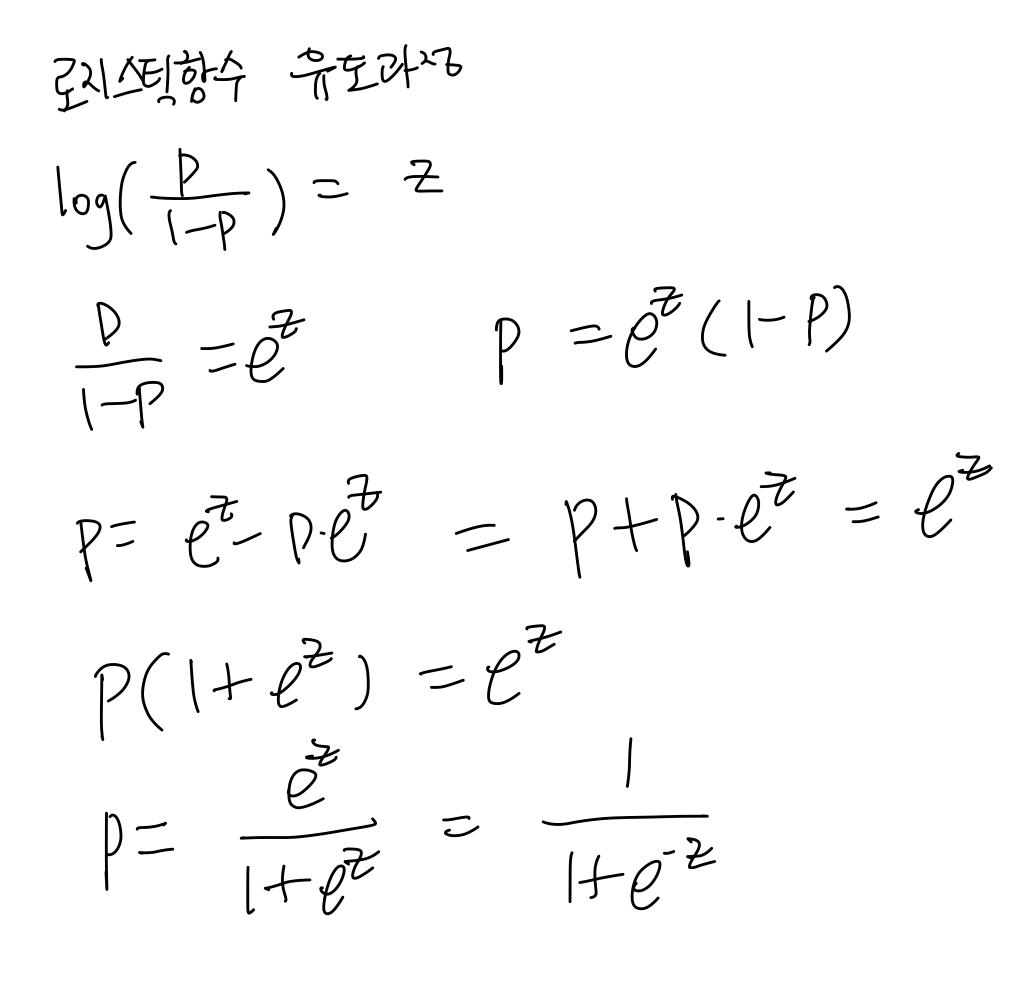

In [4]:
# 다음날 추가했는데, 이게 더 이해가 쉬운것 같음
Image("./image/로지스틱함수유도2.png", width=400)

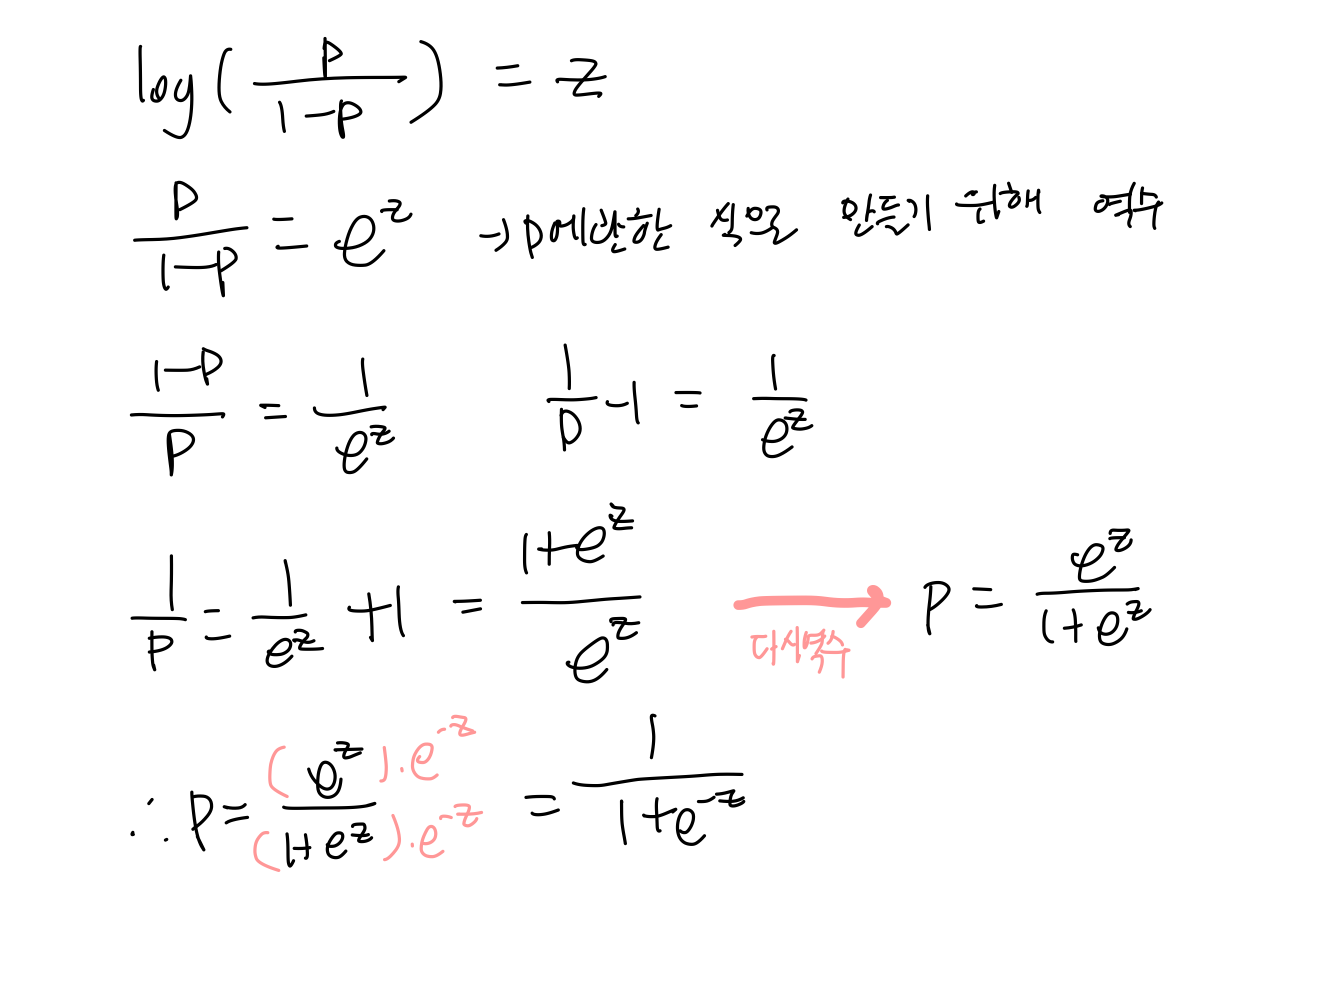

In [23]:
Image("./image/로지스틱함수유도.png", width=500)

## 로지스틱 회귀 중간 정리

- 로지스틱 회귀의 목표: 이진분류
- -∞ 에서 ∞까지의 범위를 갖는 z값을 조절할 방법이 필요
- 시그모이드 함수를 활성화 함수로 사용하여서 z 값을 확률로 해석
- 시그모이드 함수의 확률인 a를 0과 1로 구분하기 위해 임계함수를 사용
- 결과적으로 입력값의 범위는 컸지만 활성화 함수, 임계함수를 거쳐 0 또는 1의 값을 갖게 됨

---

# 4-3. 로지스틱 손실함수를 경사하강법에 적용합니다

- 선형회귀에서는 정답과 예상값의 오차 제곱이 최소가 되는 가중치와 절편을 찾는 것이 목표
- 로지스틱회귀에서는 올바르게 분류된 샘플데이터의 비율을 높이는 것이 목표
- 올바르게 분류된 샘플의 비율은 미분 가능함수가 아니기 때문에 경사하강법의 손실함수로 사용하기 어려움
- 이를 위해 로지스틱 손실함수를 이용함

## 로지스틱 손실함수를 제대로 알아봅시다

- 로지스틱 손실함수는 다중분류를 위한 손실함수인 크로스 엔트로피 손실함수를 이진분류 버전으로 만든 것
- 자세한 설명은 07장에서 진행

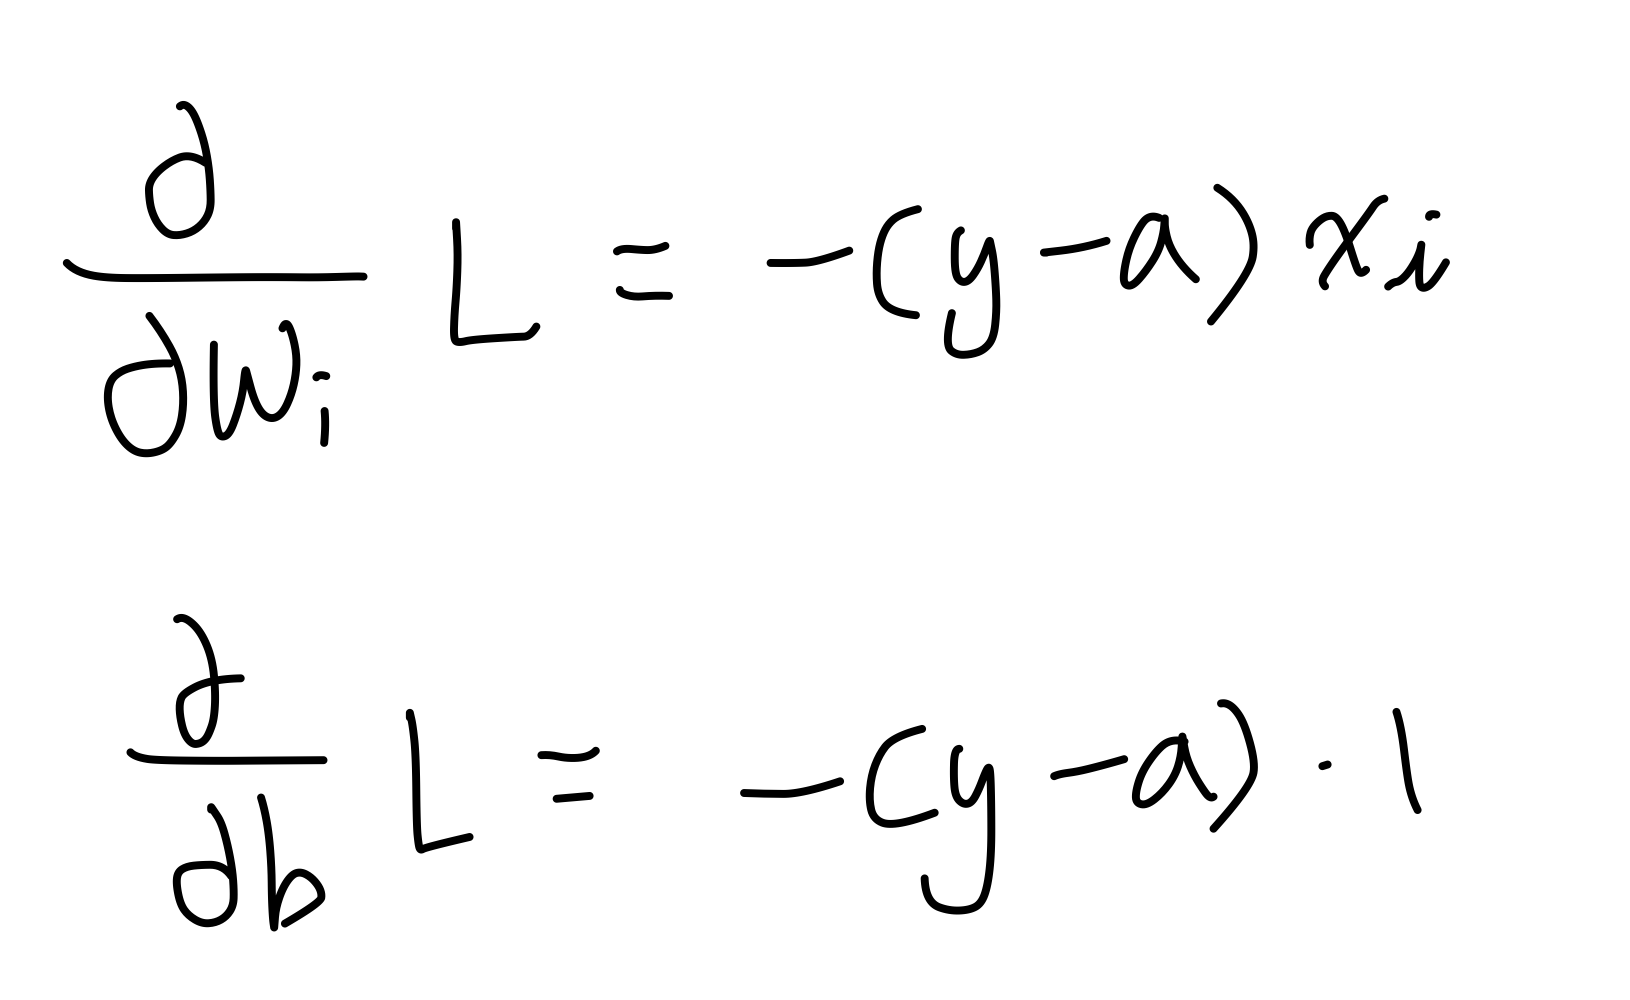

In [46]:
# 로지스틱 손실함수의 미분결과
Image("./image/로지스틱손실함수미분1.png", width=250)

> 로지스틱 손실함수 미분 결과 증명하기 (어렵다면 건너뛰어도 된다고 하심)

- 로지스틱 손실함수의 미분은 가중치, 절편에 대해 바로 미분하기 어려움
- 연쇄법칙을 이용해서 로지스틱 손실함수 도출에 필요한 z와 a를 각각 미분하고 미분결과를 곱해서 계산예정

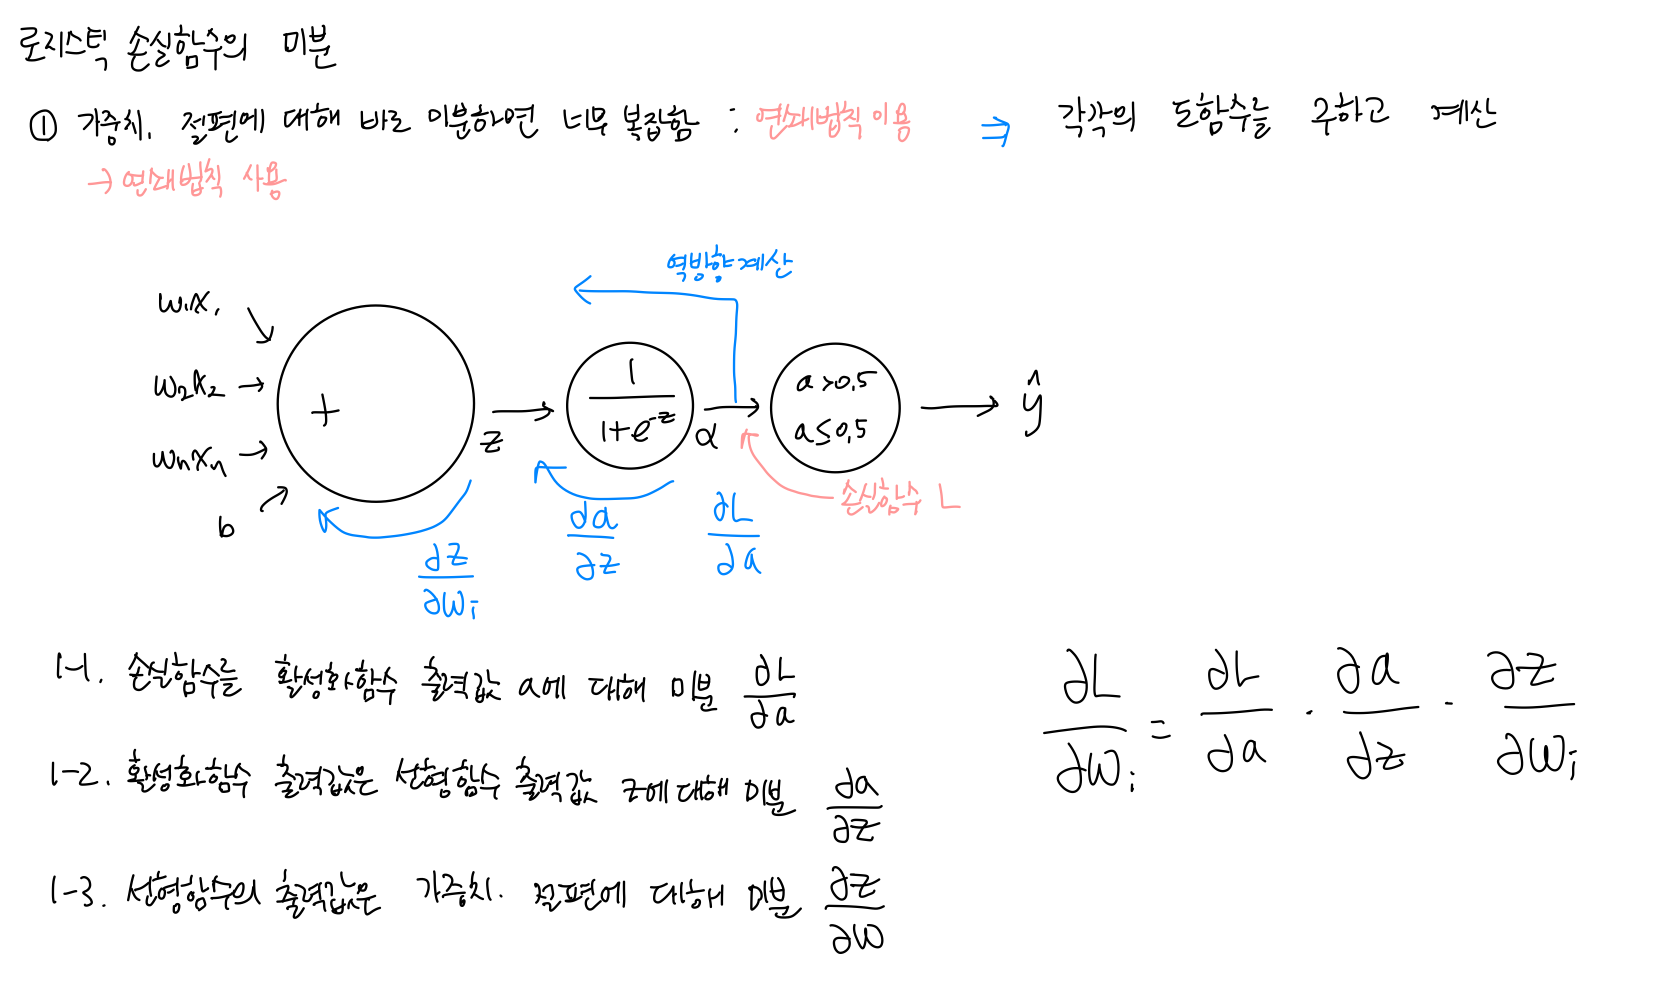

In [35]:
Image("./image/로지스틱손실함수미분2.png", width=800)

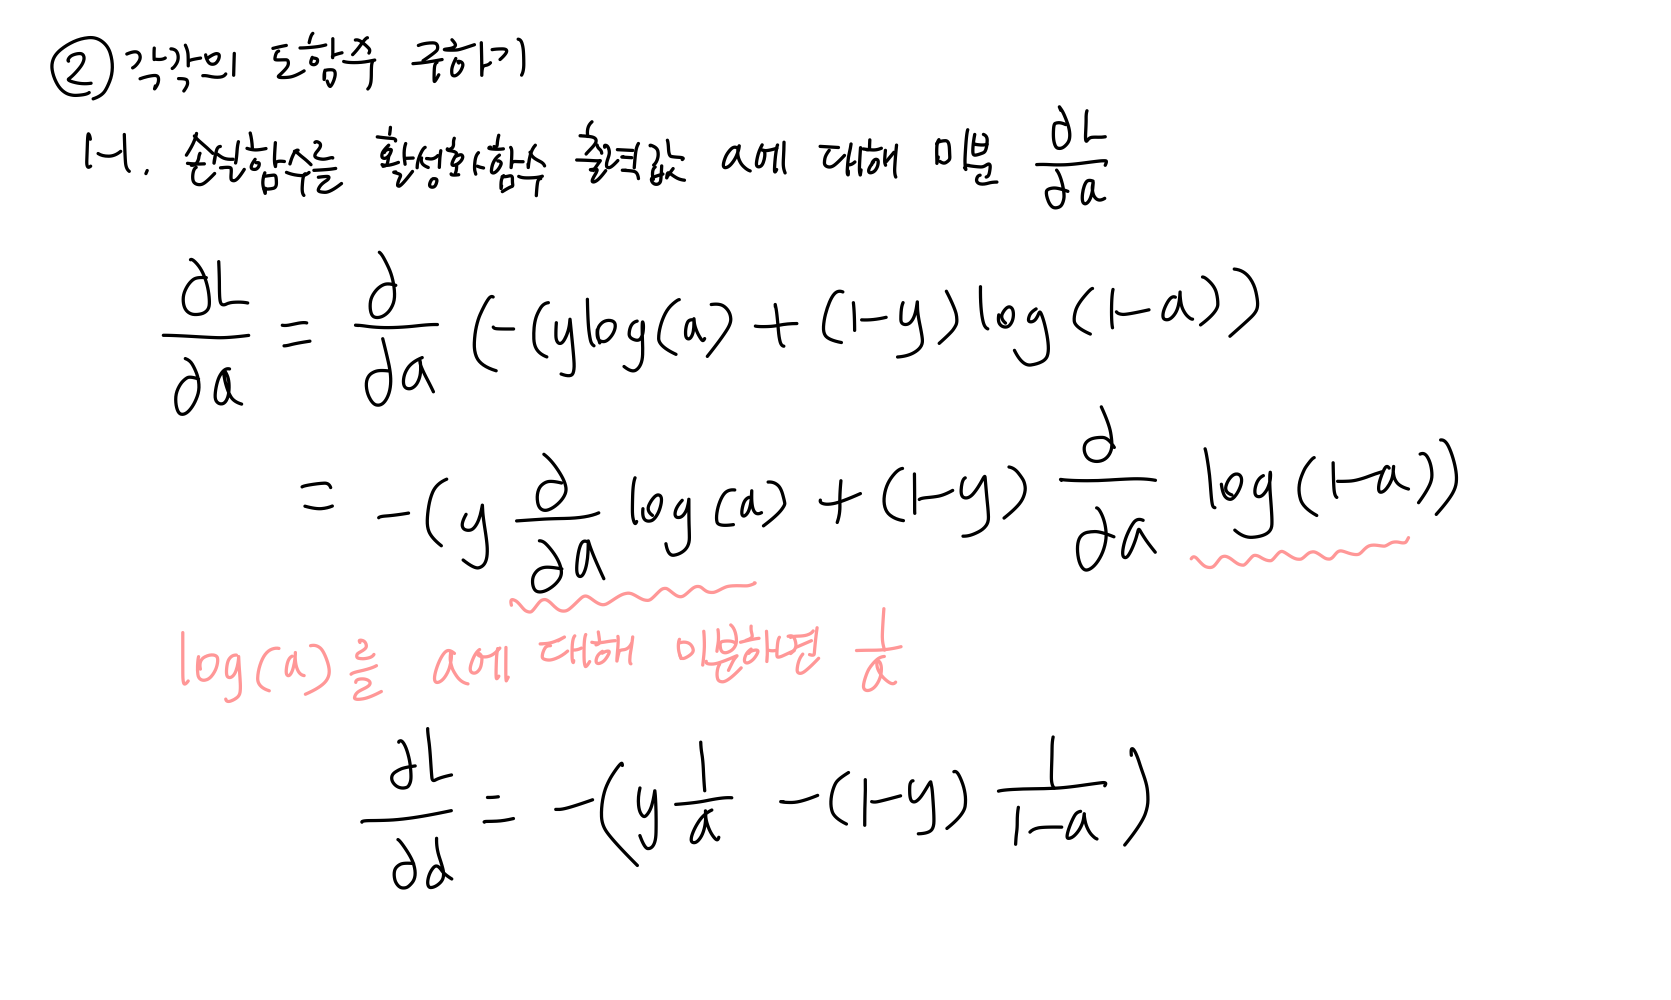

In [41]:
Image("./image/로지스틱손실함수미분3.png", width=650)

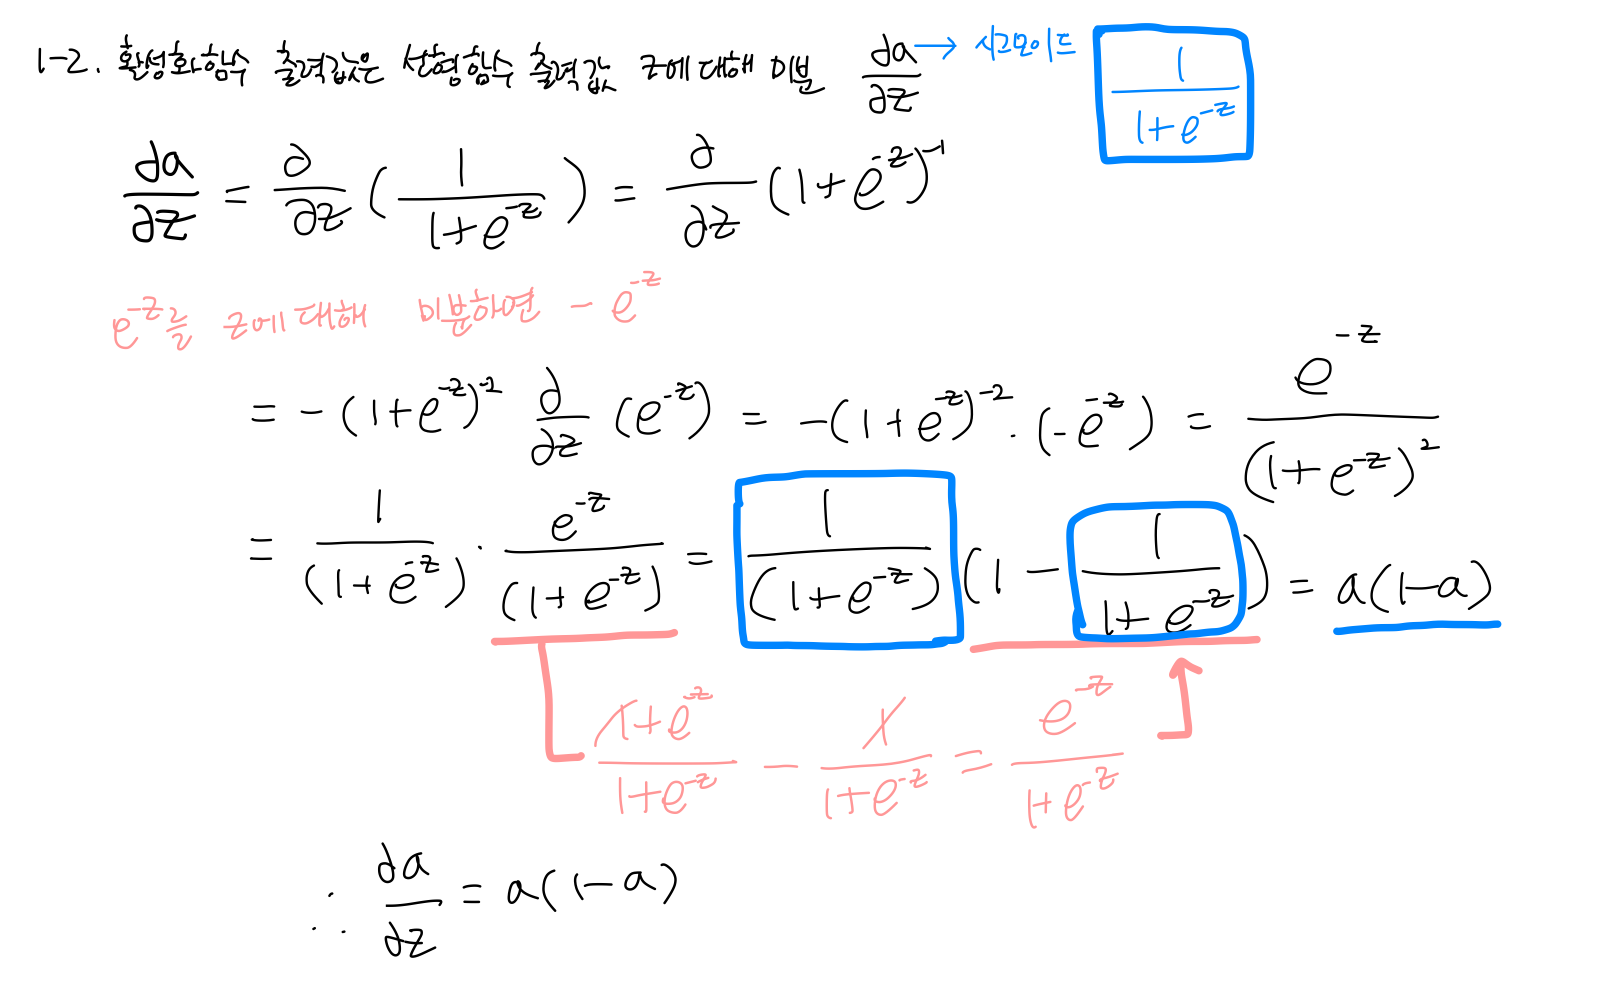

In [49]:
Image("./image/로지스틱손실함수미분4.png", width=800)

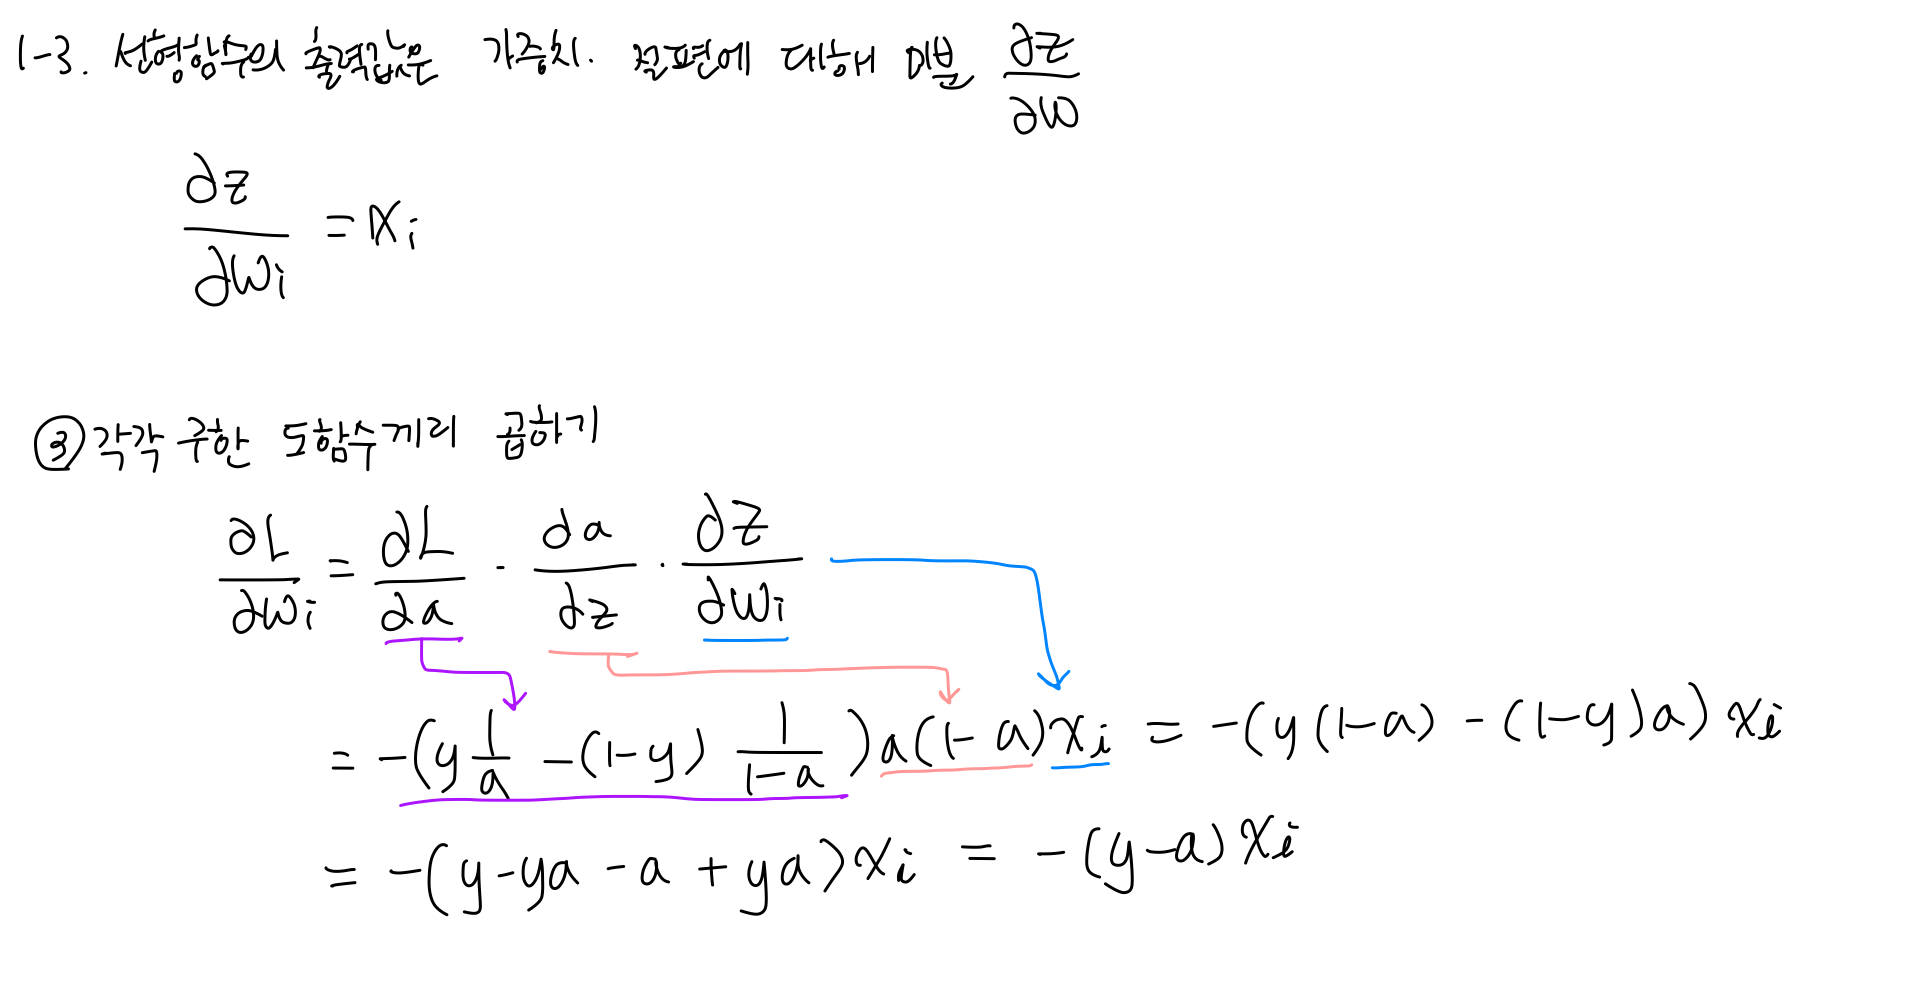

In [45]:
Image("./image/로지스틱손실함수미분최종.png", width=700)

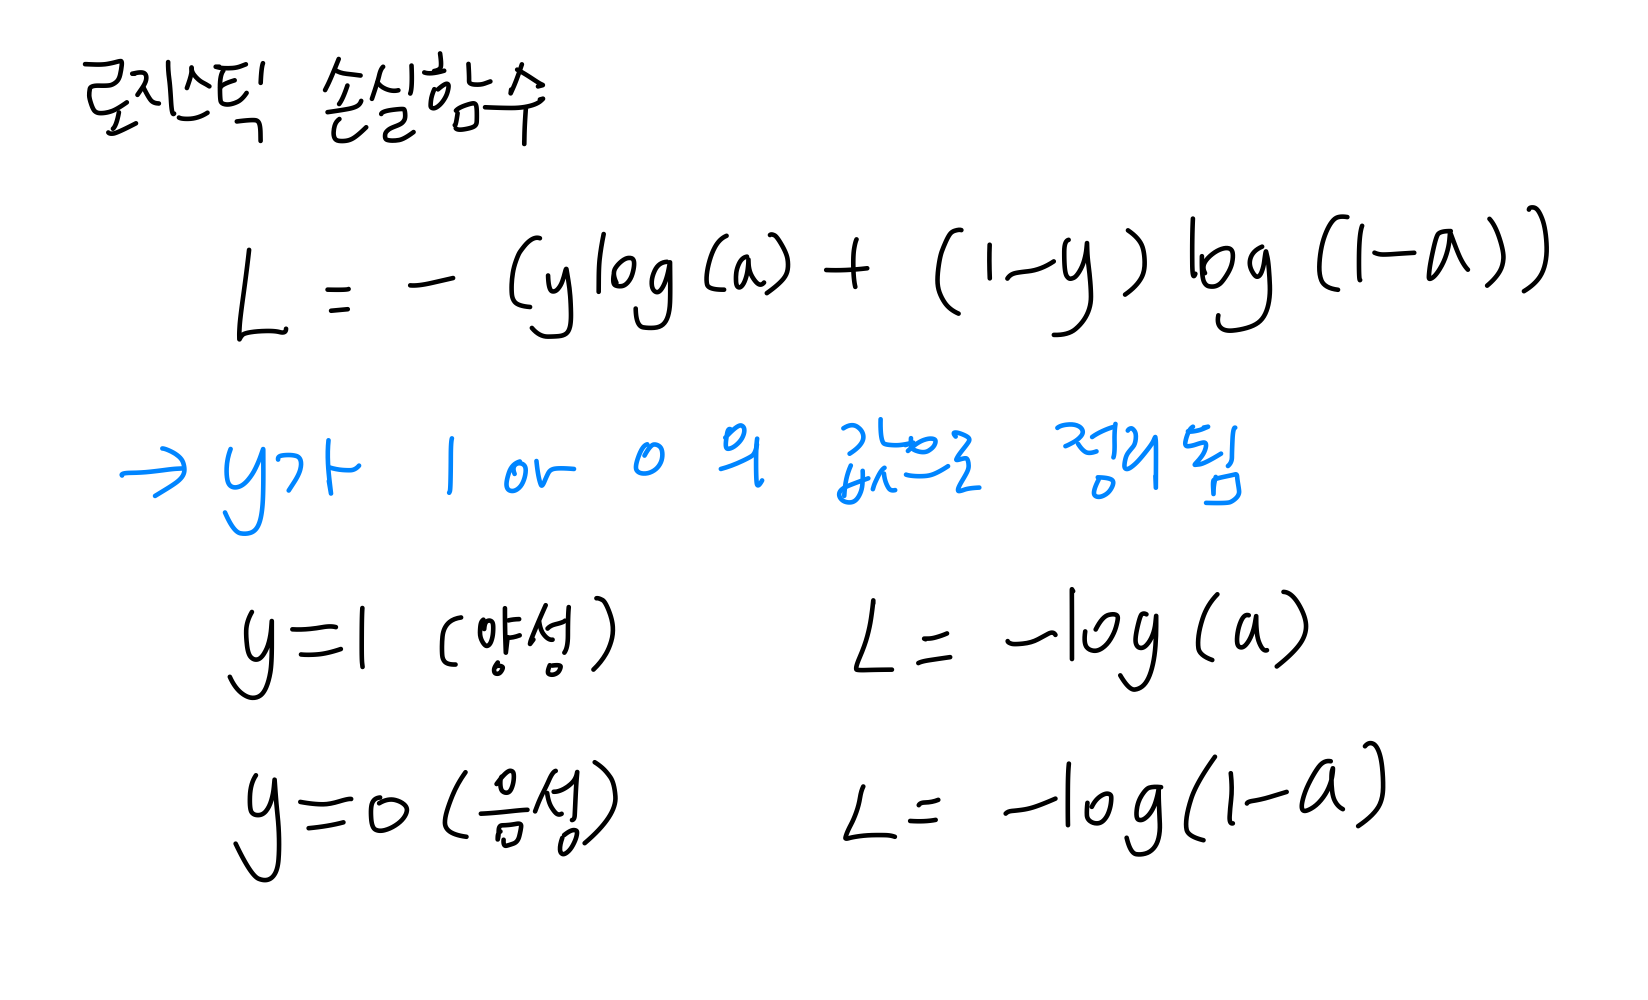

In [52]:
Image("./image/로지스틱손실함수미분결과.png", width=500)

- 로지스틱 손실함수의 미분은 제곱오차의 미분값과 같다 (y_hat이 a로 바뀜)
    - 제곱오차의 가중치에 대한 미분 값 -(y-y_hat)*x
    - 로지스틱 손실함수의 가중치에 대한 미분 값 -(y-a)*x
    - 제곱오차의 절편에 대한 미분 값 -(y-y_hat)*1
    - 로지스틱 손실함수의 절편에 대한 미분 값 -(y-a)*1

## 로지스틱 손실 함수의 미분 과정 정리하고 역전파 이해하기

- 로지스틱 손실함수 L은 a에 대해 미분
- z는 z에 대해 미분
- z는 w에 대해 미분
- 도함수의 곱을 가중치 업데이트에 사용
- 로지스틱 손실함수에 대한 미분이 연쇄법칙에 의해 진행되는 구조를 gradient가 역전파 된다고 말함

> 가중치 업데이트 하기

- 가중치 업데이트는 가중치에서 미분한 로지스틱 손실함수를 빼주면 됨

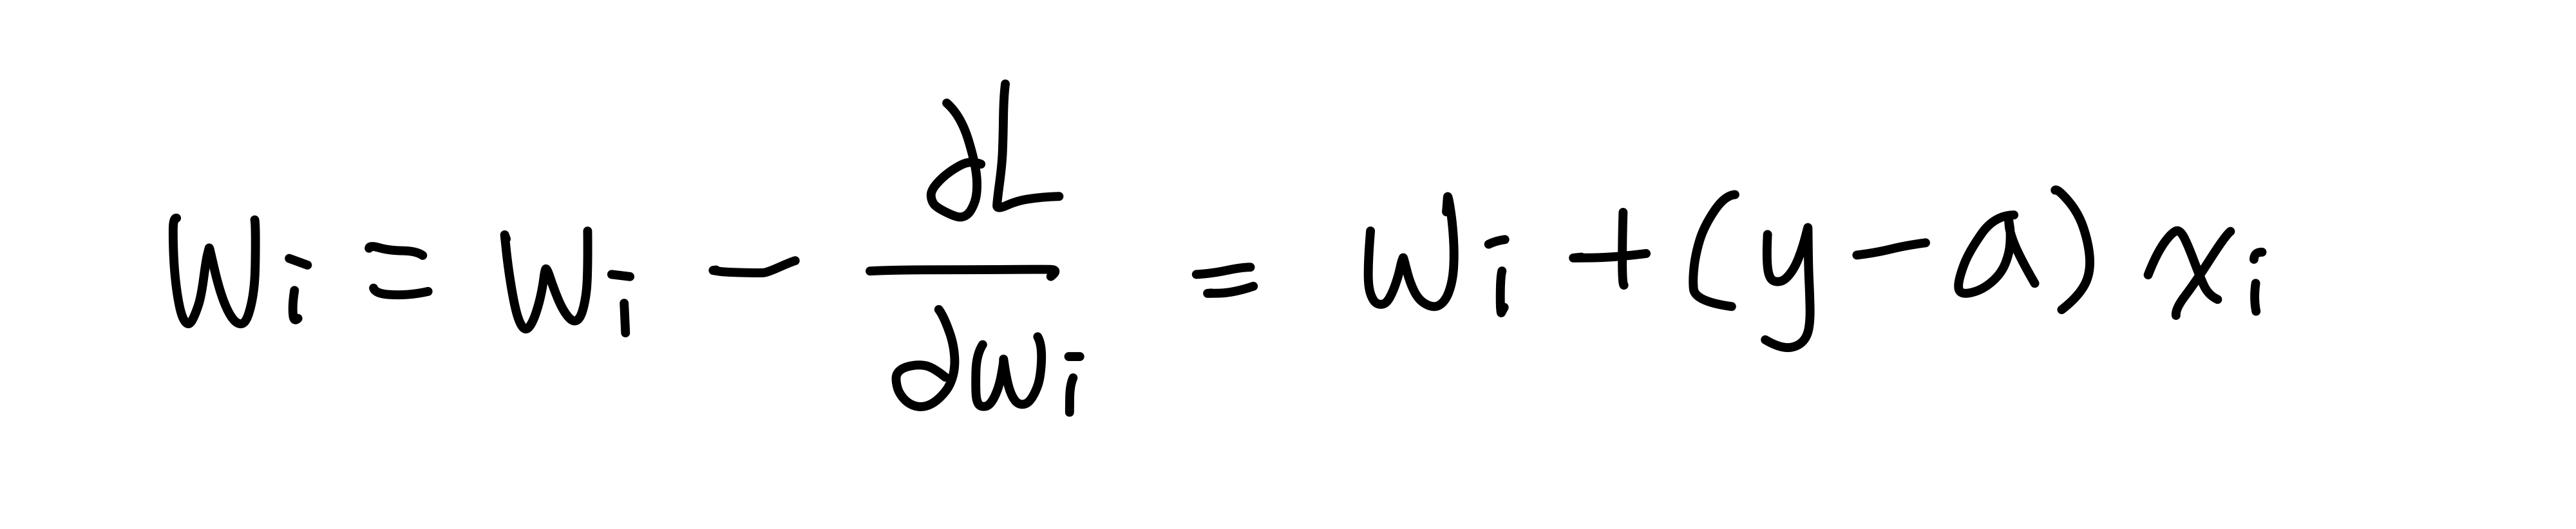

In [56]:
Image("./image/가중치업데이트.png", width=400)

> 절편 업데이트 하기

- 절편 미분도 가중치 미분과 동일한 방법으로 진행
- 손실함수를 z에 대해 미분하고 z를 절편 b에 대해 미분하는 방법
- 최종 절편에 대해 미분된 손실함수는 -(y-a)*1

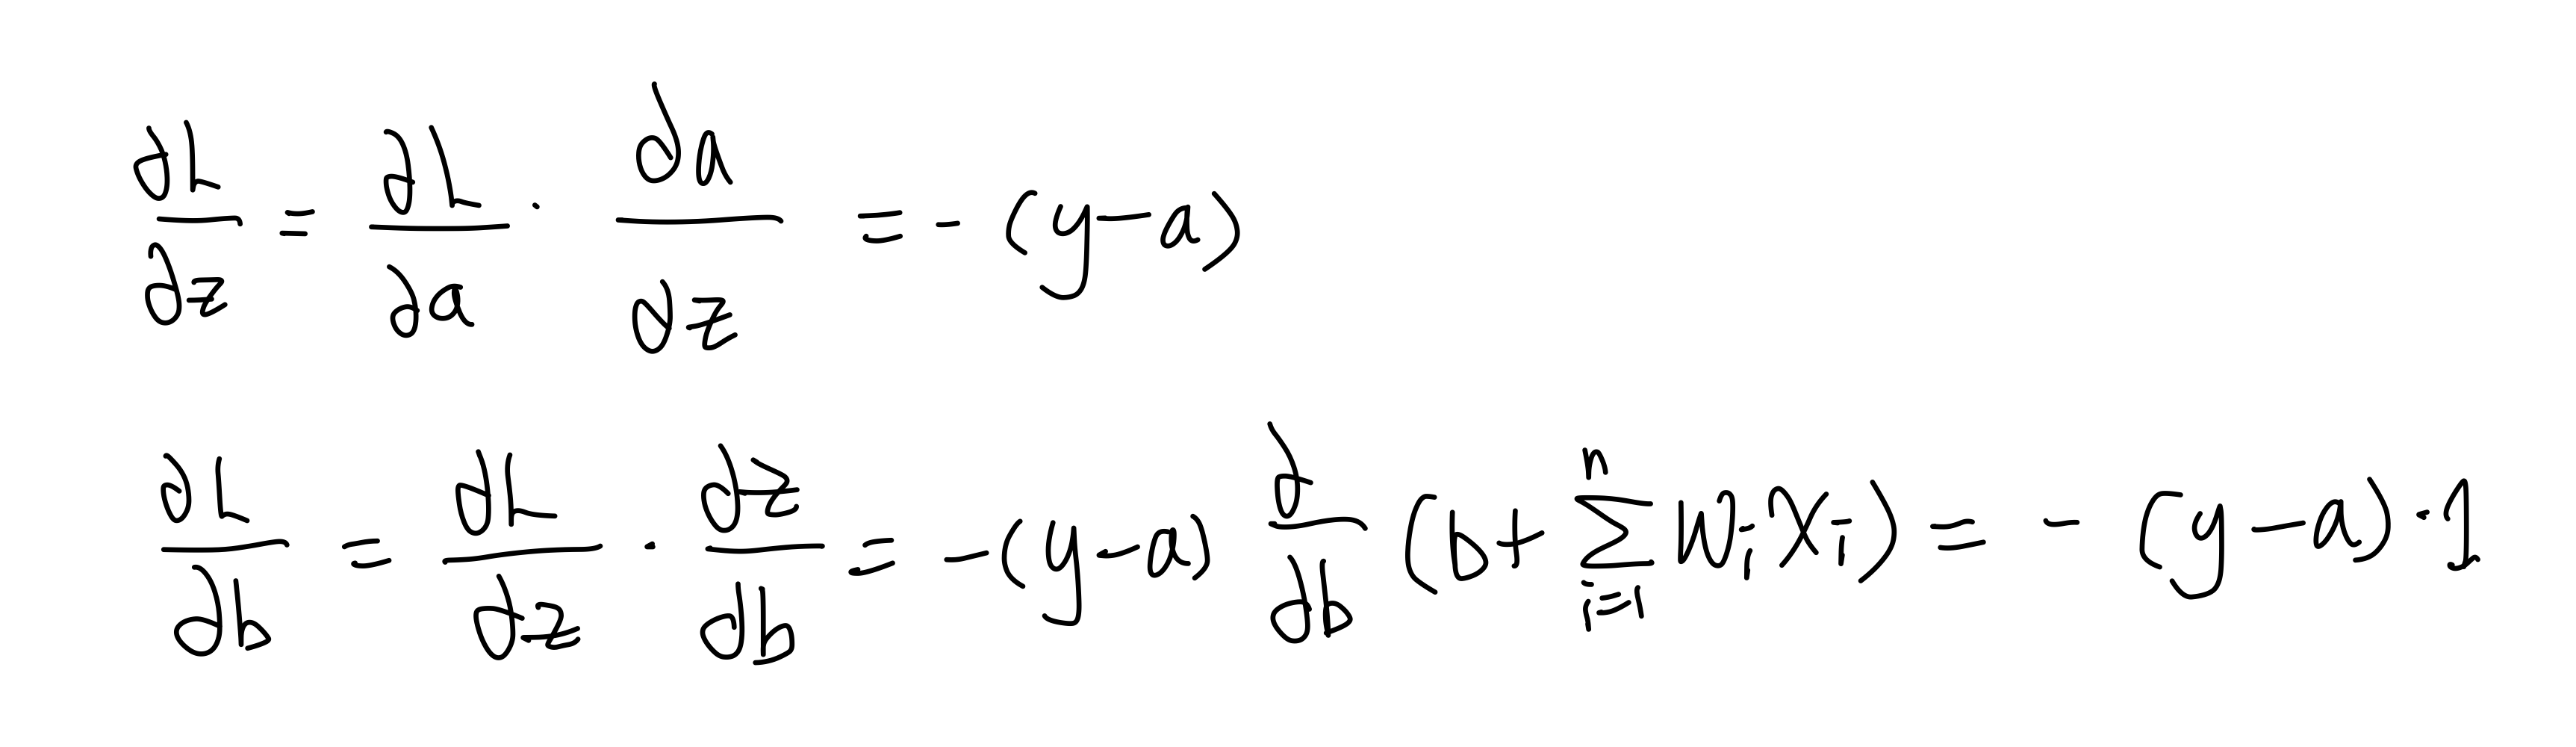

In [59]:
Image("./image/절편에대한미분.png", width=600)

- 절편 업데이트는 가중치 업데이트와 동일하게 절편에서 절편에 대해 미분한 로지스틱 손실함수를 빼주면 됨

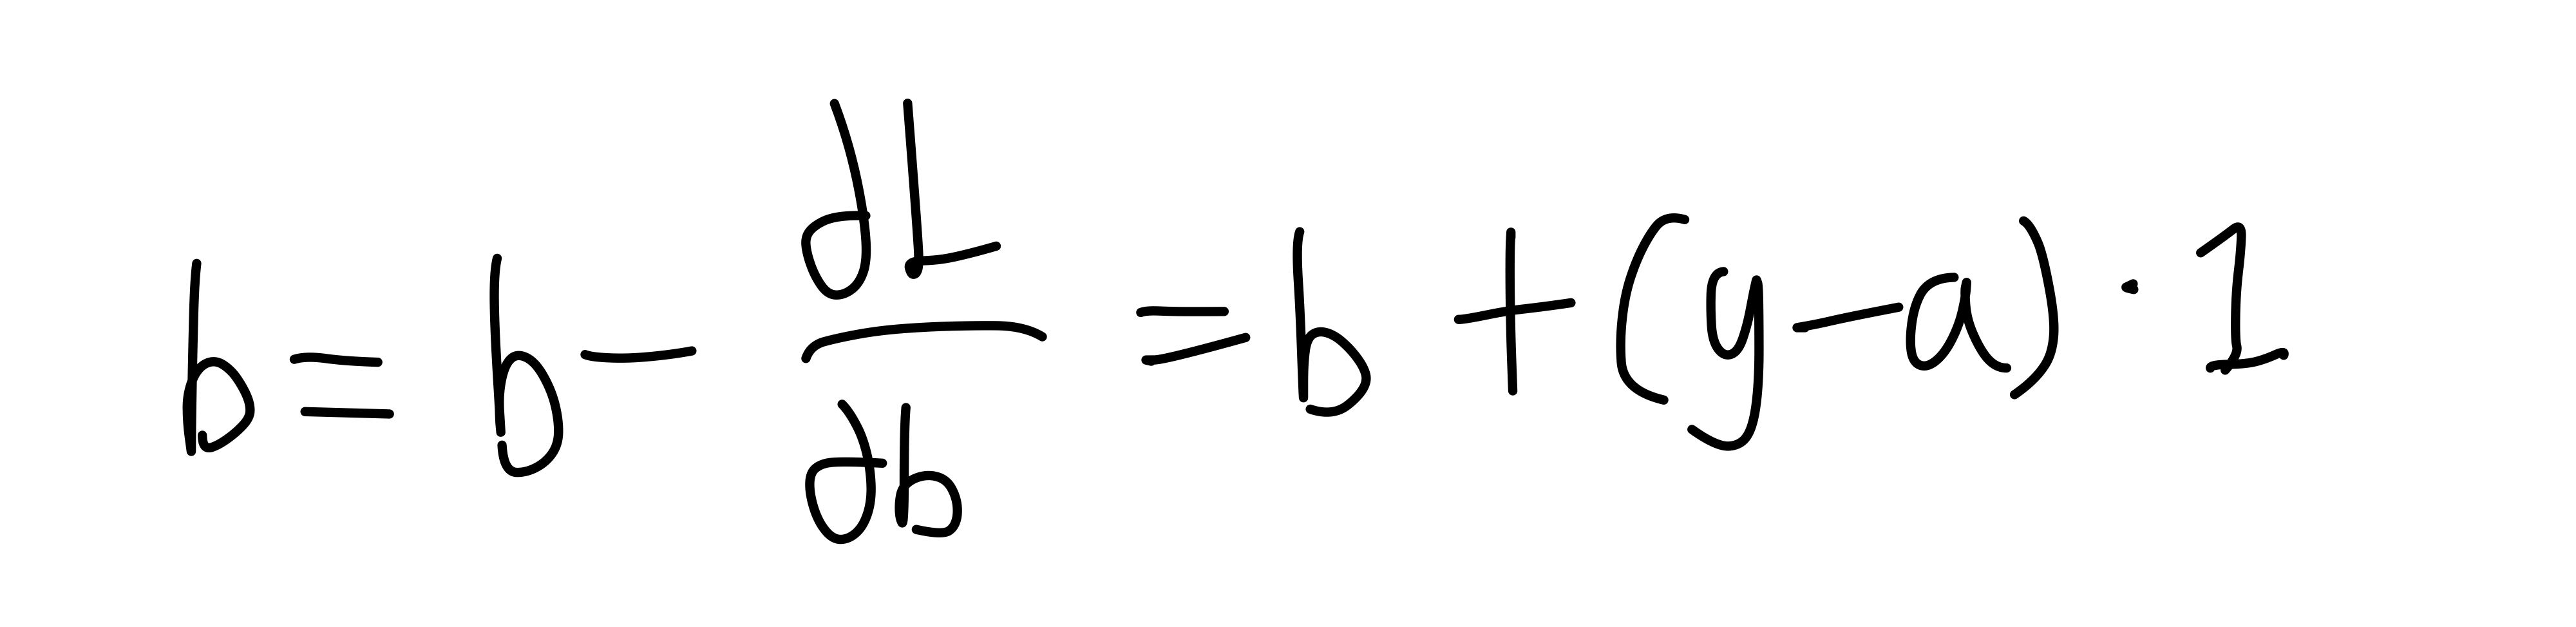

In [61]:
Image("./image/절편업데이트.png", width=300)

# 4-4. 분류용 데이터 세트를 준비합니다.

- 사이킷런에 포함된 위스콘신 유방암 데이터 세트 사용

> 유방암 데이터 세트를 소개합니다

- 유방암 데이터 세트에는 유방암 세포틔 특징 10개에 대하여 평균, 표준오차, 최대 이상치가 기록되어 있음
- 해결해야하는 문제는? 유방암 데이터 샘플이 악성종양(true)인지 혹은 정상종양(false)인지 구분하는 이진분류 문제
    - 의학분야에서는 건강한 종양을 양성종양, 건강하지 않은 종양을 악성종양이라고 부름
    - 이진분류에서는 해결해야할 목표를 양성샘플이라고 부름 
    - 해결과제는 악성종양을 찾는 것이므로 악성종양이 양성샘플이 됨
    - 이 책에서는 양성 종양 대신 정상종양으로 사용하겠음

|구분|의학|이진분류|
|----|--------------------|-------|
|좋음|양성종양(정상종양)|음성샘플|
|나쁨|악성종양|양성샘플(해결과제)

> 유방암 데이터 세트 준비하기

## 1. load_breast_cancer()함수 호출하기

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

## 2. 입력데이터 확인하기

In [7]:
cancer.data.shape, cancer.target.shape

((569, 30), (569,))

In [9]:
# 샘플 확인하기
# 30개의 값을 가진 하나의 샘플 * 569개 sample이 존재함
cancer.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [21]:
# 어떤 데이터인지 디스크립션 살펴보기
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

|특성|설명|
|:---:|:---:|
|id|환자 식별 번호|
|dignosis|유방암 종양(M=악성, B=양성)|
|radius|세포의 크기|
|texture|질감(흑백 처리했을때의 표준편차 값으로 계산)|
|perimeter|둘레|
|area|면적|
|smoothness|매끄러움(반경의 국소적 변화 측정)|
|compactness|작은 정도(perimeter2/area−1로 계산)|
|concavity|오목함(윤곽의 오목한 부분의 정도)|
|concave points|오목한곳의 수|
|symmetry|대칭성|
|fractal dimension|프랙탈 차원(coastlineapproximation−1로 계산)|

*출처* Taeyoon Kim 2019-10-05 15:29 https://partrita.github.io/posts/H2O/

> 3. 박스플롯으로 특성의 사분위 관찰하기

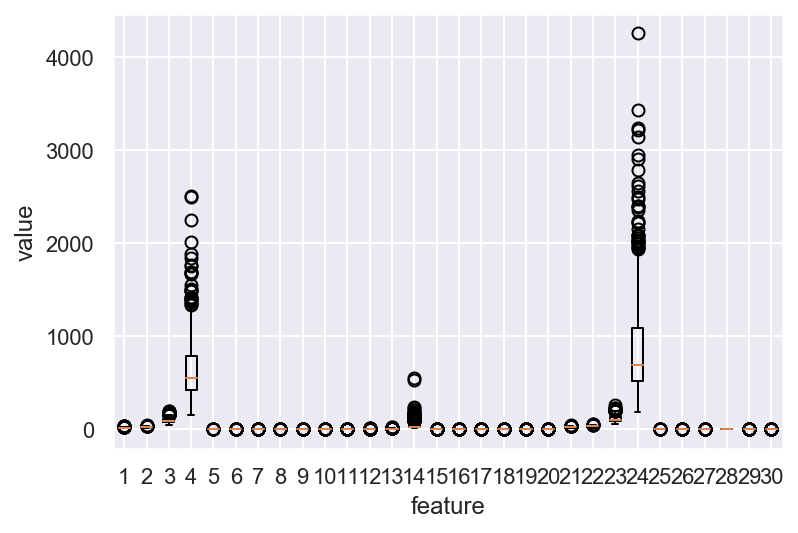

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show();

> 눈에 띄는 특성 살펴보기

- 4, 14, 24번 특성이 다른 특성보다 값의 분포가 큰 것을 확인하 수 있음
- 어떤 특성인지 확인하기

In [16]:
# 전체 특성 확인
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
# indexing은 0번부터 되지만, 그래프의 특성은 1번부터 적혀있으므로 1씩 뺀 숫자로 feature_names에 접근
# 면적 관련 특성들이 분포가 넓게 되어 있음
cancer.feature_names[[3, 13, 23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

> 5. 타깃데이터 확인하기

- 음성샘플(정상종양)과 양성샘플(악성종양)을 구분하는 이진분류 문제
- cancer.target에는 0과 1만 있음 0은 음성클래스, 1은 양성 클래스 : 1일 경우 악성종양을 가진다고 봄
- unique를 사용해서 각각 몇개의 값이 있는지 확인(return_counts option 사용)

In [25]:
# 음성샘플(정상종양)은 212개, 양성샘플(악성종양)은 357개가 있음
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

> 6. 훈련데이터세트 저장하기

In [29]:
# 변수에 할당
x = cancer.data
y = cancer.target

# 04-5 로지스틱 회귀를 위한 뉴런을 만듭니다.

- 훈련 데이터 세트 전체를 학습에 사용하면 모델의 성능을 테스트해볼 수 없음
- 성능평가 없이 실전에 투입되었을 때 잘못된 결과가 나올 수 있음
- 훈련에 사용했던 데이터를 평가에도 사용한다면 평가 데이터를 모두 맞출 수도 있음
- 어떻게 모델 성능을 제대로 평가할 수 있을까?

## 모델의 성능 평가를 위한 훈련 세트와 테스트 세트

- 훈련된 모델의 실전 성능을 일반화 성능이라고 부름
- 훈련에 사용한 데이터 셋을 평가에도 사용한다면 성능이 당연히 좋게 나올 것 (과도하게 낙관적)
- 문제를 해결하기 위해 데이터 셋을 두 개로 나누어 하나는 train에 하나는 test에만 사용하면 됨
- 훈련 데이터 셋을 train/test로 나눌 때는 2가지 규칙을 지켜야 함
    - 훈련 데이터 셋을 나눌 때는 테스트 셋보다 훈련 셋이 더 많아야 함
    - 훈련 데이터 셋을 나누기 전에 양성, 음성 클래스가 훈련 셋이나 테스트 셋의 어느 한쪽으로 몰리지 않고 골고루 섞이도록 해야함

## 훈련세트와 테스트 세트로 나누기

- cancer 데이터 셋은 양성샘플 212개, 음성샘플 357개
- 클래스의 비율을 유지하면서 train, test로 구분해야 함
- 전체 데이터 세트 비중이 212:357 이기 때문에 train, test로 구분했을 때도 각각 train, test 안에서의 양성음성 비중은 212:357을 유지해야함

> 1. train_test_split()함수로 훈련데이터세트 나누기

In [31]:
# sklearn의 train_test_split()함수는 기본적으로 훈련세트 75%, 테스트 세트 25%로 나누어 줌
from sklearn.model_selection import train_test_split

In [33]:
# train_test_split함수로는 4개의 값이 반환되는데, 그 순서가 x_trian, x_test, y_train, y_test 순
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

- train_test_split옵션
    - stratiry: 훈련데이터 분리 시 클래스 비율을 동일하게 만들어 줌/ 기본적으로 데이터를 나누기 전에 섞고 나누지만 클래스의 비율이 불균형한 경우는 straify를 y로 지정하여 동일하게 나누어지도록 함
    - test_size: 기본적으로는 75:25로 나누어 주지만 0.2로 지정하면 80:20으로 나누어 줌
    - random_state: train_test_split을 통해 데이터를 섞은 다음 나눈 결과가 항상 일정하도록 random_state 변수에 특정 숫자를 넣어줄 수 있음 (여기서는 실험 결과를 여러번 해도 동일하게 산출하기 위해 사용/ 실전에서는 사용할 필요 없음)

> 2. 결과 확인하기

In [35]:
# 나눠진 비율 확인하기 (train과 test를 8:2로 나눔)
# 455:114는 4:1로 잘 나누어짐
x_train.shape, x_test.shape

((455, 30), (114, 30))

> 3. unique 함수로 훈련세트의 타깃 확인하기

In [38]:
# train data는 170:285로 클래스의 비율을 거의 비슷하게 유지하고 있음
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285], dtype=int64))

In [43]:
# 원본 데이터 셋에서 양성의 비율
212/375

0.5653333333333334

In [44]:
# train 데이터 셋에서 양성의 비율
170/285

0.5964912280701754

## 로지스틱 회귀 구현하기

- 로지스틱회귀 구현을 위해 정방향 계산과 역방향 계산을 구현해야 함

In [ ]:
class LogisticNeuron:
    
    def __init__(self):
        # 가중치와 절편의 초기값을 셋팅하지 않음
        self.w = None
        self.b = None
        
    def forpass(self, x):
        # 3장 선형회귀에서는 1차식의 표현으로 함수를 사용하지 않음
        # wi와 xi의 곱을 다 더하기 위해 np.sum 사용
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad

## 훈련 메서드 구현

> 1. fit 메서드 구현

In [46]:
def fit(self, x, y, epochs=100):
    # 가중치 초기화 x의 shape과 같은 shape에 모든 value가 1인 array를 만듦
    self.w = np.ones(x.shape[1])
    # 절편은 0으로 초기화
    self.b = 0
    for i in range(epochs):
        for x_i, y_i in zip(x,y): # 모든 샘플에 대해 반복
            z = self.forpass(x_i) # 정방향 계산
            a = self.activation(z) # 활성화 함수 적용
            err = -(y_i - a) # 오차 계산
            w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
            self.w -= w_grad # 가중치 업데이트
            self.b -= b_grad # 절편 업데이트

> 2. activation() 메서드 구현

In [47]:
def activation(self, z):
    a = 1 / (1 + np.exp(-z)) # 시그모이드 식
    return a

## 예측하는 메서드 구현하기

> 1. predict 메서드 구현

- 선형회귀에서는 예측을 위해 forpass() 메서드를 사용했음
- 여러개의 샘플을 한꺼번에 예측하려면 forpass() 메서드를 여러번 호출해야 했음
- 새로운 샘플에 대한 예측값을 계산해주는 predict() 메서드 구현

In [48]:
def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 선형함수 적용
    a = self.activation(np.array(z))     # 활성화 함수 적용
    return z > 0.5                       # 계단함수 적용 / 최종적으로 0.5보다 큰 확률을 가진 z만 return

## 구현 내용 한눈에 보기

In [53]:
class LogisticNeuron:
    
    def __init__(self):
        # 가중치와 절편의 초기값을 셋팅하지 않음
        self.w = None
        self.b = None
        
    def forpass(self, x):
        # 3장 선형회귀에서는 1차식의 표현으로 함수를 사용하지 않음
        # wi와 xi의 곱을 다 더하기 위해 np.sum 사용
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100):
        # 가중치 초기화 x의 shape과 같은 shape에 모든 value가 1인 array를 만듦
        self.w = np.ones(x.shape[1])
        # 절편은 0으로 초기화
        self.b = 0
        for i in range(epochs):
            for x_i, y_i in zip(x,y): # 모든 샘플에 대해 반복
                z = self.forpass(x_i) # 정방향 계산
                a = self.activation(z) # 활성화 함수 적용
                err = -(y_i - a) # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
                self.w -= w_grad # 가중치 업데이트
                self.b -= b_grad # 절편 업데이트
            
    def activation(self, z):
        a = 1 / (1 + np.exp(-z)) # 시그모이드 식
        return a
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x] # 선형함수 적용
        a = self.activation(np.array(z))     # 활성화 함수 적용
        return a > 0.5                       # 계단함수 적용 / 최종적으로 0.5보다 큰 확률을 가진 z만 return

## 로지스틱 회귀모델 훈련시키기

> 1. 모델 훈련하기

In [54]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in exp


> 테스트 세트를 사용해 모델의 정확도 평가하기 

In [55]:
# 맞으면 1, 틀리면 0, 평균으로 확인
np.mean(neuron.predict(x_test) == y_test)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in exp


0.8245614035087719

- 0.82를 accuracy라고 표현(정확도)
- 직접 만든 클래스의 성능은 좋은 편이 아님
- 실전에서는 사이킷런과 같은 안정적인 패키지 사용을 권함

# 4-6. 로지스틱 회귀 뉴런으로 단일층 신경망을 만듭니다

- 지금까지 로지스틱회귀로 단일층 신경망을 구현했지만, layer의 개념을 사용하지 않음
- 신경망에 대해 이해하기

## 일반적인 신경망의 모습을 알아봅니다

- 신경망은 입력층, 은닉층, 출력층으로 구분되어 있고 출력층에 활성화함수가 있음

> 단일층 신경망의 모습을 알아봅니다

- 로지스틱회귀는 은닉층이 없는 신경망이라고 볼 수 있음
- 입력과 출력층만을 가지는 신경망을 단일층 신경망이라고 부름

## 단일층 신경망을 구현합니다

- 이미 LogisticNeuron 클래스에서 단일층 신경망을 구현해봄
- 몇 가지 유용한 기능을 추가할 예쩡
- 선형회귀나 로지스틱 회귀의 경우 모두 경사하강법을 사용함
- 경사하강법은 손실함수의 결과값을 최소솨하는 방향으로 가중치를 업데이트 함
- LogisticNeuron을 복사해서 SingleLayer로 바꾼 후 코드 작성하기

```
class LogisticNeuron:
    
    def __init__(self):
        # 가중치와 절편의 초기값을 셋팅하지 않음
        self.w = None
        self.b = None
        
    def forpass(self, x):
        # 3장 선형회귀에서는 1차식의 표현으로 함수를 사용하지 않음
        # wi와 xi의 곱을 다 더하기 위해 np.sum 사용
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100):
        # 가중치 초기화 x의 shape과 같은 shape에 모든 value가 1인 array를 만듦
        self.w = np.ones(x.shape[1])
        # 절편은 0으로 초기화
        self.b = 0
        for i in range(epochs):
            for x_i, y_i in zip(x,y): # 모든 샘플에 대해 반복
                z = self.forpass(x_i) # 정방향 계산
                a = self.activation(z) # 활성화 함수 적용
                err = -(y_i - a) # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
                self.w -= w_grad # 가중치 업데이트
                self.b -= b_grad # 절편 업데이트
            
    def activation(self, z):
        a = 1 / (1 + np.exp(-z)) # 시그모이드 식
        return a
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x] # 선형함수 적용
        a = self.activation(np.array(z))     # 활성화 함수 적용
        return a > 0.5                       # 계단함수 적용 / 최종적으로 0.5보다 큰 확률을 가진 z만 return
```

> 손실함수의 결과값 저장 기능 추가하기

- self.activation()메서드로 계산한 a는 np.log()의 계산을 위해 한번 더 조정 
    - (a가 0에 가까워지면 np.log()함수의 값은 음의 무한대가 되고, 1에 가까워지면 np.log()함수의 값은 0이 되기 때문)
    - 손실값이 무한해지면 정확한 계산이 불가함. np.clip함수로 주어진 범위 밖의 값을 잘라냄

In [61]:
class SingleLayer: #클래스 이름 변경
    
    def __init__(self):
        # 가중치와 절편의 초기값을 셋팅하지 않음
        # __init__ 메서드에 손실함수의 결과값을 저장하기 위한 리스트를 만듦
        self.w = None
        self.b = None
        self.losses = []
        
    def forpass(self, x):
        # 3장 선형회귀에서는 1차식의 표현으로 함수를 사용하지 않음
        # wi와 xi의 곱을 다 더하기 위해 np.sum 사용
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100):
        # 가중치 초기화 x의 shape과 같은 shape에 모든 value가 1인 array를 만듦
        self.w = np.ones(x.shape[1])
        # 절편은 0으로 초기화
        self.b = 0
        for i in range(epochs):
            for x_i, y_i in zip(x,y): # 모든 샘플에 대해 반복
                z = self.forpass(x_i) # 정방향 계산
                a = self.activation(z) # 활성화 함수 적용
                err = -(y_i - a) # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
                self.w -= w_grad # 가중치 업데이트
                self.b -= b_grad # 절편 업데이트
                # 안전한 로그계산을 위해 클리핑 후 손실을 누적함
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a)) # 로지스틱 손실함수 L을 구하는 식/ 아래 이미지 참고
                
            self.losses.append(loss/len(y)) #에포크마다의 손실을 평균값으로 저장
            
    def activation(self, z):
        a = 1 / (1 + np.exp(-z)) # 시그모이드 식
        return a
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x] # 선형함수 적용
        a = self.activation(np.array(z))     # 활성화 함수 적용
        return a > 0.5                       # 계단함수 적용 / 최종적으로 0.5보다 큰 확률을 가진 z만 return

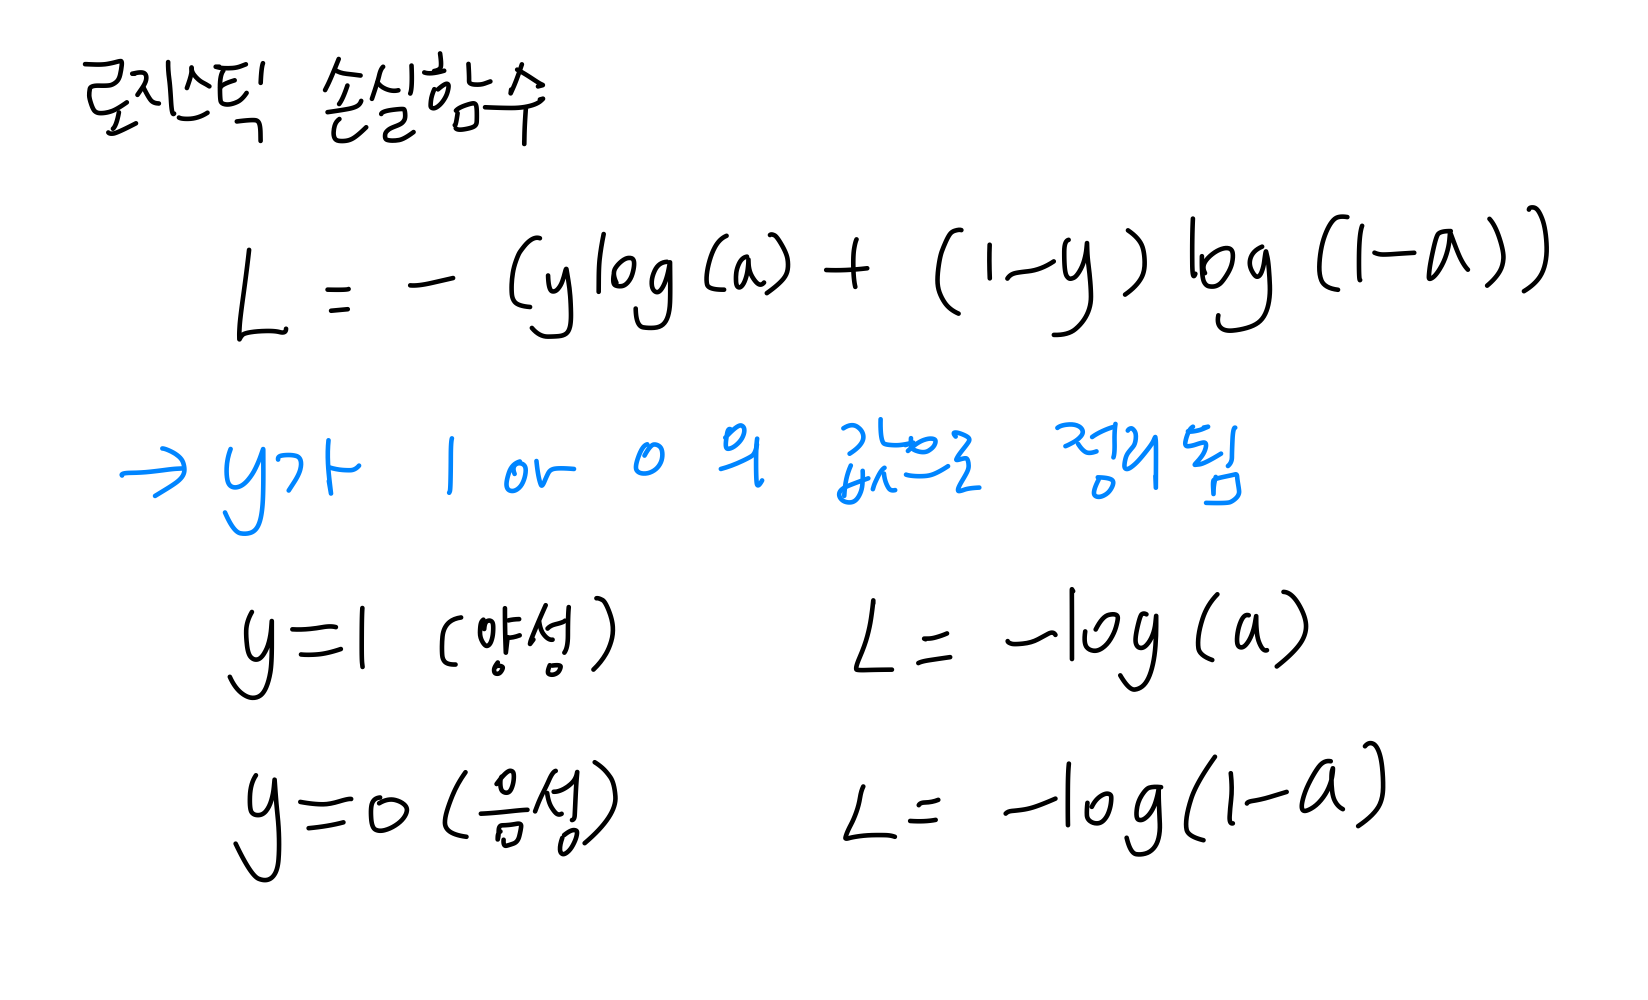

In [60]:
Image("./image/로지스틱손실함수미분결과.png", width=500)

## 여러가지 경사하강법에 대해 알아봅니다

- 지금까지는 샘플데이터 1개에 대한 그래디언트를 계산했음 : 확률적 경사하강법이라고 부름
- 전체 훈련세트를 사용하여 한 번에 그래디언트를 구하는 방법도 있음 : 배치 경사 하강법
- 배치 크기를 작게 하여 처리하는 방법도 있음 : 미니배치 경사하강법
- 확률적 경사하강법
    - 샘플 데이터 1개마다 그래디언트를 계산하여 가중치를 업데이트 하므로 계산 비용은 적지만 최적값에 수렴하는 과정이 불안정함
- 배치 경사하강법
    - 훈련 데이터 세트를 한 번에 사용하여 계싼하므로 가중치가 최적값으로 수렴하는 과정은 안정적이나 계산비용이 커짐
- 미니배치 경사하강법
    - 둘의 장점을 절충한 방법
    - 확률적 경사하강법보다는 수렴과정이 매끄럽고 배치경사하강법보다는 덜 매끄러운 그래프가 그려짐

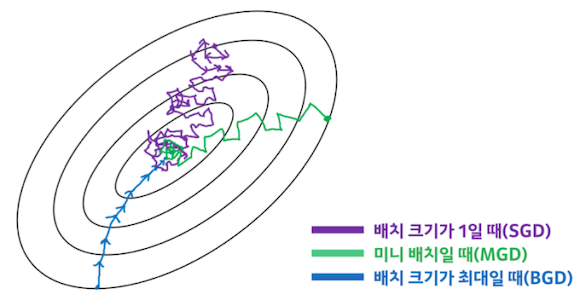

In [62]:
Image("http://t1.kakaocdn.net/braincloud/homepage/article_image/57a5abec-5c1d-494c-97b6-8b81a0b7f361.png")

- 출처: 이수경, 박천명, 2019/12/23, torchlars가 탄생하기까지, https://www.kakaobrain.com/blog/113

> 매 에포크마다 훈련 세트의 샘플 순서를 섞어 사용하기

- 지금까지 살펴본 모든 경사하강법들은 매 에포크마다 훈련 세트의 샘플 순서를 섞어서 가중치의 최적값을 계산함
- 순서를 섞는 방법으로 넘파이 배열의 인덱스를 섞은 후 인덱스 순서대로 샘플을 뽑는 방법
- np.random.permutation()함수를 사용하면 이 방법을 구현할 수 있음
- 두 번째 for문에서 indexes배열을 이용하는데, 이 배열에 무작위 번호표가 들어있다고 생각하면 됨

In [65]:
def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
        loss = 0
        indexes = np.random.permutation(np.arange(len(x)))
        for i in indexes:
            z = self.forpass(x[i])
            a = self.activation(z)
            err = -(y[i]-a)
            w_grad, b_grad = self.backprop(x[i], err)
            self.w -= w_grad
            self.b -= b_grad
            a = np.clip(a, 1e-10, 1-1e-10)
            loss += -(y[i] * np.log(a) + (1-y[i]) * np.log(1-a))
        self.losses.append(loss/len(y))

> score() 메서드 추가하기

In [66]:
def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 정방향 계산
    # 시그모이드 함수를 쓰지 않아도 z가 0보다 작으면 시그모이드 출력값은 0.5보다 작을 것
    # z가 0보다 크면 시그모이드 출력값이 0.5보다 커짐
    # z 값만 확인하면 되기 때문에 시그모이드를 사용하지 않음
    return np.array(z) > 0

def score(self, x, y):
    return np.mean(self.predict(x)==y)

In [69]:
class SingleLayer: #클래스 이름 변경
    
    def __init__(self):
        # 가중치와 절편의 초기값을 셋팅하지 않음
        # __init__ 메서드에 손실함수의 결과값을 저장하기 위한 리스트를 만듦
        self.w = None
        self.b = None
        self.losses = []
        
    def forpass(self, x):
        # 3장 선형회귀에서는 1차식의 표현으로 함수를 사용하지 않음
        # wi와 xi의 곱을 다 더하기 위해 np.sum 사용
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z)) # 시그모이드 식
        return a
    
#     def fit(self, x, y, epochs=100):
#         # 가중치 초기화 x의 shape과 같은 shape에 모든 value가 1인 array를 만듦
#         self.w = np.ones(x.shape[1])
#         # 절편은 0으로 초기화
#         self.b = 0
#         for i in range(epochs):
#             for x_i, y_i in zip(x,y): # 모든 샘플에 대해 반복
#                 z = self.forpass(x_i) # 정방향 계산
#                 a = self.activation(z) # 활성화 함수 적용
#                 err = -(y_i - a) # 오차 계산
#                 w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
#                 self.w -= w_grad # 가중치 업데이트
#                 self.b -= b_grad # 절편 업데이트
#                 # 안전한 로그계산을 위해 클리핑 후 손실을 누적함
#                 a = np.clip(a, 1e-10, 1-1e-10)
#                 loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a)) # 로지스틱 손실함수 L을 구하는 식/ 아래 이미지 참고
                
#             self.losses.append(loss/len(y)) #에포크마다의 손실을 평균값으로 저장

    # 위에 있던 fit 함수에서 np.random.permutation함수를 적용해서 인덱스를 섞어서 추출하도록 함
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x))) # 인덱스 섞기
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = -(y[i] - a)
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= w_grad
                self.b -= b_grad
                a = np.clip(a, 1e-10, 1-1e-10)
                
                loss += -(y[i] * np.log(a) + (1-y[i]) * np.log(1-a))
            self.losses.append(loss/len(y))
    
#     def predict(self, x):
#         z = [self.forpass(x_i) for x_i in x] # 선형함수 적용
#         a = self.activation(np.array(z))     # 활성화 함수 적용
#         return a > 0.5                       # 계단함수 적용 / 최종적으로 0.5보다 큰 확률을 가진 z만 return
    
    # 위에 있던 함수를 아래 함수로 바꾸면서 score 함수를 추가함
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x] # 정방향 계산
        # 시그모이드 함수를 쓰지 않아도 z가 0보다 작으면 시그모이드 출력값은 0.5보다 작을 것
        # z가 0보다 크면 시그모이드 출력값이 0.5보다 커짐
        # z 값만 확인하면 되기 때문에 시그모이드를 사용하지 않음
        return np.array(z) > 0

    def score(self, x, y):
        return np.mean(self.predict(x)==y)

## 단일층 신경망 훈련하기

> 1. 단일층 신경망 훈련하고 정확도 출력하기

In [70]:
# 책에서 나온 값은 0.92982456/ 결과값은 0.92105263
# 인덱스를 랜덤하게 섞기 때문에 값이 다르게 나올 수 있음
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


0.9210526315789473

- LogisticNeuron보다 accuracy가 훨씬 좋아진 이유는 에포크마다 훈련세트를 무작위로 섞어서 손실함수의 값을 줄여나갔기 때문

> 2. 손실함수 누적값 확인하기

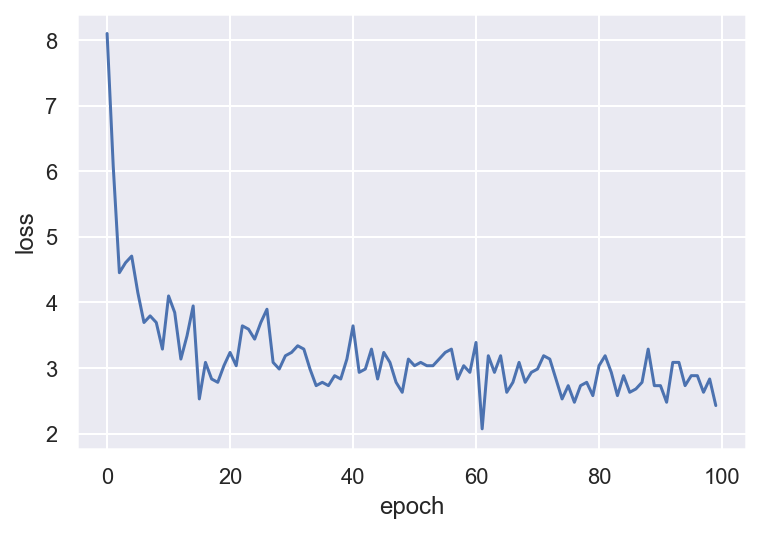

In [71]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show();

- 에포크가 진행됨에따라 손실함수 값이 감소하고 있음을 확인할 수 있음

# 4-7. 사이킷런으로 로지스틱 회귀를 수행합니다

- 사이킷런에서 경사하강법은 SGDClassifier에 구현되어 있음

## 사이킷런으로 경사하강법 적용하기

> 1. 로지스틱 손실함수 지정하기

- SGDClassifier 클래스에 로지스틱 회귀를 적용하려면 loss매개변수에 손실함수로 log를 지정

In [72]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

- max_iter: 반복횟수
- tol: 로지스틱 손실함수의 값이 tol에 설정한 값만큼 감소하지 않으면 반복을 중단함 (만약, tol을 설정하지 않으면 max_iter를 늘리라는 경고가 발생)
    - 사용자에게 손실함수가 최적으로 수렴할만큼 충분히 반복횟수를 입력했는지 확인하도록 함

> 2. 사이킷런으로 훈련하고 평가하기

In [75]:
# fit 후 accuracy score 확인하기
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

> 3. 사이킷런으로 예측하기

In [76]:
# 예측결과
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [77]:
# 실제결과
y_test[0:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0])